https://www.academia.edu/113294629/EXPLORING_SEASONAL_AFFECT_IN_CRIMES_CORRELATION_BETWEEN_CRIMES_AND_PARTICULAR_DAYS

https://medium.com/@yuce.ahmet.tr/exploring-seasonal-affect-in-crimes-b91beb0ea3be

EXPLORING_SEASONAL_AFFECT_IN_CRIMES_3_RAMADAN_PERIOD, Ahmet YÜCE

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#IMPORT-LIBRARIES" data-toc-modified-id="IMPORT-LIBRARIES-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>IMPORT LIBRARIES</a></span></li><li><span><a href="#USER-DEFINED-FUNCTIONS" data-toc-modified-id="USER-DEFINED-FUNCTIONS-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>USER DEFINED FUNCTIONS</a></span></li><li><span><a href="#SAMPLE-DATA-1:-UNC-CHAPEL-HILL-CAMPUS-POLICE-CRIME-LOG_2013-2018" data-toc-modified-id="SAMPLE-DATA-1:-UNC-CHAPEL-HILL-CAMPUS-POLICE-CRIME-LOG_2013-2018-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>SAMPLE DATA-1: UNC-CHAPEL HILL CAMPUS POLICE CRIME LOG_2013-2018</a></span></li><li><span><a href="#SAMPLE-DATA-2:-LOS-ANGELES-CRIME-DATA_2010-2019" data-toc-modified-id="SAMPLE-DATA-2:-LOS-ANGELES-CRIME-DATA_2010-2019-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>SAMPLE DATA-2: LOS ANGELES CRIME DATA_2010-2019</a></span></li><li><span><a href="#SAMPLE-DATA-3:-KANSAS-CITY-CRIME-DATA_2009-2016" data-toc-modified-id="SAMPLE-DATA-3:-KANSAS-CITY-CRIME-DATA_2009-2016-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>SAMPLE DATA-3: KANSAS CITY CRIME DATA_2009-2016</a></span></li><li><span><a href="#SAMPLE-DATA-4:-DETROIT-CRIME-INCIDENTS_2009-2016" data-toc-modified-id="SAMPLE-DATA-4:-DETROIT-CRIME-INCIDENTS_2009-2016-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>SAMPLE DATA-4: DETROIT CRIME INCIDENTS_2009-2016</a></span></li><li><span><a href="#SAMPLE-DATA-5:-DENVER-CRIME-DATASET_2019-2023" data-toc-modified-id="SAMPLE-DATA-5:-DENVER-CRIME-DATASET_2019-2023-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>SAMPLE DATA-5: DENVER CRIME DATASET_2019-2023</a></span></li><li><span><a href="#SAMPLE-DATA-6:-VANCOUVER-CRIME-DATASET_2003-2017" data-toc-modified-id="SAMPLE-DATA-6:-VANCOUVER-CRIME-DATASET_2003-2017-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>SAMPLE DATA-6: VANCOUVER CRIME DATASET_2003-2017</a></span></li><li><span><a href="#SAMPLE-DATA-7:-CHICAGO-CRIME-DATASET_2001-2023" data-toc-modified-id="SAMPLE-DATA-7:-CHICAGO-CRIME-DATASET_2001-2023-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>SAMPLE DATA-7: CHICAGO CRIME DATASET_2001-2023</a></span></li><li><span><a href="#SAMPLE-DATA-8:-BALTIMORE-CRIME-DATASET_2011-2015" data-toc-modified-id="SAMPLE-DATA-8:-BALTIMORE-CRIME-DATASET_2011-2015-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>SAMPLE DATA-8: BALTIMORE CRIME DATASET_2011-2015</a></span></li><li><span><a href="#SAMPLE-DATA-9:-ATLANTA-CRIME-DATASET_2009-2017" data-toc-modified-id="SAMPLE-DATA-9:-ATLANTA-CRIME-DATASET_2009-2017-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>SAMPLE DATA-9: ATLANTA CRIME DATASET_2009-2017</a></span></li><li><span><a href="#SAMPLE-DATA-10:-OAKLAND-CRIME-STATISTICS_2011-2016" data-toc-modified-id="SAMPLE-DATA-10:-OAKLAND-CRIME-STATISTICS_2011-2016-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>SAMPLE DATA-10: OAKLAND CRIME STATISTICS_2011-2016</a></span></li><li><span><a href="#CONCLUSION" data-toc-modified-id="CONCLUSION-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>CONCLUSION</a></span></li></ul></div>

# IMPORT LIBRARIES

In [1]:
# pip install hijri_converter
from hijri_converter import convert

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option('display.max_rows', 300)   # None

# USER DEFINED FUNCTIONS

In [3]:
def highlight_greater_than(value, threshold):
    if value > threshold:
        return 'background-color: yellow'
    else:
        return ''

In [4]:
# Filter rows that fall within the last ten days of the 9th months
def filter_last_ten_days_of_9th_months(date):
    # Extract the month and day from the Hijri_Date column
    month = int(date.split('-')[1])
    day = int(date.split('-')[2])
    
    # Check for the month: whether it's the 9th month and day: whether it's between 21 and 30
    return month == 9 and day >= 21

In [5]:
def common_codes(df):
    count_days = (max(df.date) - min(df.date)).days + 1
    df['Hijri_Date'] = df['date'].apply(lambda x: convert.Gregorian(x.year, x.month, x.day).to_hijri())
    df['Hijri_Year_Month'] = df['Hijri_Date'].astype(str).str[:-3]
    ramadan_df = df[df['Hijri_Date'].astype(str).apply(filter_last_ten_days_of_9th_months)]
    ramadan_dates_list_in_gregorian = pd.to_datetime(ramadan_df['date']).dt.strftime('%Y-%m-%d').unique().tolist()
    ramadan_dates_list_in_gregorian = sorted(ramadan_dates_list_in_gregorian, key=lambda x: datetime.strptime(x, '%Y-%m-%d'))       
    count_ramadan_days = df.Hijri_Year_Month[df['Hijri_Year_Month'].astype(str).str.endswith("09")].nunique() * 10
    count_other_days = count_days - count_ramadan_days  
    return count_days, count_other_days, df['Hijri_Date'], df['Hijri_Year_Month'], ramadan_df, \
    ramadan_dates_list_in_gregorian, count_ramadan_days

In [6]:
def ramadan_10_days(df):
    df['date'] = pd.to_datetime(df['date'])
    count_days, count_other_days, df['Hijri_Date'], df['Hijri_Year_Month'], ramadan_df, ramadan_dates_list_in_gregorian,\
    count_ramadan_days = common_codes(df)
   
    print("Total number of days:", count_days)    
    print(len("Total number of days:") * "-")
    print("Total number of cases:", len(df))
    print(len("Total number of cases:") * "-")
    
    average_case_count = round((len(df) / count_days), 2)
    print("Average Daily Case Count:", average_case_count)
    print(len("Average Daily Case Count:") * "-")

    print("Yearly case counts according to the Gregorian calendar:")
    print(len("Yearly case counts according to the Gregorian calendar:") * "-")
    print(df.date.dt.year.value_counts())
    print(len("Case counts according to the Hijri calendar:") * "-")
    
    print("Case counts according to the Hijri calendar:")
    print(len("Case counts according to the Hijri calendar:") * "-")
    print(df['Hijri_Date'].astype(str).str[:-6].value_counts())
    print(len("Average case count in the last ten days of Ramadan months:") * "-")

    # Total number of cases in the last ten days of Ramadan months (rows)
    count_ramadan_rows = len(ramadan_df)
       
    # Average case count in the last ten days of Ramadan months:
    avg_count_of_ramadan_incidents = count_ramadan_rows / count_ramadan_days
    print("Average case count in the last ten days of Ramadan months:", round(avg_count_of_ramadan_incidents,4))
    print(len("Average case count in the last ten days of Ramadan months:") * "-")

    # Total number of cases in other days (rows)
    count_other_rows = len(df[~df['Hijri_Date'].astype(str).apply(filter_last_ten_days_of_9th_months)])
    count_other_days = count_days - count_ramadan_days   
    avg_count_of_other_incidents = count_other_rows / count_other_days
    print("Average case count in other days:", round(avg_count_of_other_incidents,4))
    print(len("Average case count in other days:") * "-")
    
    print("Ratio of Ramadan cases to other cases:", f"{avg_count_of_ramadan_incidents / avg_count_of_other_incidents:.{4}f}")
    print(len("Ratio of Ramadan cases to other cases:") * "-")

In [7]:
def incidents_by_types(df):
    # Explore distribution of incidents by types
    
    count_days, count_other_days, df['Hijri_Date'], df['Hijri_Year_Month'], ramadan_df, ramadan_dates_list_in_gregorian, \
    count_ramadan_days = common_codes(df)
    
    all_incidents_count = df.incident.value_counts()
    
    ramadan_incidents = df[df['date'].astype(str).isin(ramadan_dates_list_in_gregorian)]
    ramadan_incidents_count = ramadan_incidents["incident"].value_counts()
    
    other_days_incidents = df[~df['date'].astype(str).isin(ramadan_dates_list_in_gregorian)]
    other_days_incidents_count = other_days_incidents["incident"].value_counts()
           
    # Top 30 incidents by the highest frequencies
    ramadan_grouped = ramadan_incidents.groupby('incident').size().nlargest(30)
    other_days_grouped = other_days_incidents.groupby('incident').size().nlargest(30)

    # Bar plot
    plt.figure(figsize=(12, 10))
    # Ramadan Days bar plot
    plt.bar(ramadan_grouped.index, ramadan_grouped/count_ramadan_days, label='Ramadan Days')
    # Other Days bar plot
    plt.bar(other_days_grouped.index, other_days_grouped/count_other_days, alpha=0.6, label='Other Days')
    plt.xlabel('Incident Types')
    plt.ylabel('Average Daily Frequency')
    plt.title('Top 30 Incidents by Type')
    plt.legend()
    plt.xticks(rotation=90, ha='center') 
    plt.tight_layout()
    plt.show()
    
    # describe() statistics
    ramadan_incidents_desc = df[df['date'].astype(str).isin(ramadan_dates_list_in_gregorian)]["incident"].describe()
    other_days_incidents_desc = df[~df['date'].astype(str).isin(ramadan_dates_list_in_gregorian)]["incident"].describe() 
    
    incident_ratios = pd.DataFrame({'ramadan incidents': ramadan_incidents_count, 'all incidents': all_incidents_count})
    incident_ratios["ramadan incidents/total incidents"]=incident_ratios["ramadan incidents"]/incident_ratios["all incidents"]
    incident_ratios["ramadan incidents/total incidents"]=round(incident_ratios["ramadan incidents/total incidents"],4)
    sorted_ratios = incident_ratios.sort_values(by="ramadan incidents/total incidents", ascending=False)[:30]
    equal_ratio = count_ramadan_days/count_days   
    sorted_ratios['ramadan incidents'] = sorted_ratios['ramadan incidents'].astype(int)
    sorted_ratios = sorted_ratios.style.applymap(lambda x: highlight_greater_than(x, equal_ratio),\
                                                 subset=['ramadan incidents/total incidents'])  

    ramadan_dominant_incidents = incident_ratios[incident_ratios["ramadan incidents/total incidents"]>equal_ratio]
    ramadan_dominant_incidents = ramadan_dominant_incidents.sort_values(by="ramadan incidents", ascending=False)
    ramadan_dominant_incidents['ramadan incidents'] = ramadan_dominant_incidents['ramadan incidents'].astype(int)
    
    return sorted_ratios, ramadan_dominant_incidents, ramadan_incidents_desc, other_days_incidents_desc 

In [8]:
def monthly_count_plot ():

    # Extract Year-Month part of the dates
    def extract_hijri_year_month(date):
        year_month = date.split('-')[:2]
        return '-'.join(year_month)

    # Add 'Hijri_Year_Month' column
    df['Hijri_Year_Month'] = df['Hijri_Date'].astype(str).apply(extract_hijri_year_month)

    # Count monthly incidents
    monthly_count = df.groupby('Hijri_Year_Month')['Hijri_Date'].count()

    # Avg count of incidents on Hijri_Year_Month basis
    monthly_avg = monthly_count.groupby('Hijri_Year_Month').mean()

    # Overall Avg count of incidents
    overall_avg = monthly_count.mean()

    # Line plot
    plt.figure(figsize=(10, 6))

    # Line of Avg Incident counts
    plt.axhline(y=overall_avg, color='g', linestyle='--', label=f'Overall Average: {overall_avg:.2f}')

    # Line of monthly count of incidents
    plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-', color='b', label='Monthly Count')

    # Mark 9th. months
    nine_month = [i for i, month in enumerate(monthly_avg.index) if '09' in month]
    plt.scatter(monthly_avg.index[nine_month], monthly_avg.values[nine_month], color='red', s=100, label='9th Month:Ramadan')

    # Plot
    plt.title('Montly Count of Incidents on Hijri Calendar')
    plt.xlabel('Hijri_Year-Month')
    plt.ylabel('Monthly Count of Incidents')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

# SAMPLE DATA-1: UNC-CHAPEL HILL CAMPUS POLICE CRIME LOG_2013-2018

https://data.world/skillenberg/unc-police-incidents-2013-2018

In [9]:
df = pd.read_excel("unc-police-data-killenberg.xlsx", sheet_name=1) 
df

,incident,date-time,year,date-no year,location,res hall,alcohol
0,NaN,1/1/13 0:00,2013,01/01,E FRANKLIN ST,NaN,NaN
1,EMS ASSIST,1/1/13 2:25,2013,01/01,AYCOCK CIRCLE PARKING LOT UNC,NaN,NaN
2,SUSPICIOUS CONDITION (NON-CRIMINAL),1/1/13 2:49,2013,01/01,S COLUMBIA ST/E CAMERON AVE,NaN,NaN
3,EMS ASSIST,1/1/14 12:25,2014,01/01,FINLEY CLUB HOUSE UNC,NaN,NaN
4,WELL-BEING CHECK,1/1/14 20:17,2014,01/01,CRAIGE RES HALL UNC,RES HALL,NaN
...,...,...,...,...,...,...,...
12812,EMS ASSIST,9/9/17 4:24,2017,09/09,OLD EAST RES HALL UNC,RES HALL,NaN
12813,FOUND PROPERTY,9/9/17 8:19,2017,09/09,DOGWOOD PARKING DECK UNC,NaN,NaN
12814,LARCENY - FROM BUILDING,9/9/17 9:48,2017,09/09,BERRYHILL UNC,NaN,NaN
12815,ASSIST OTHER AGENCY,9/9/18 2:40,2018,09/09,E FRANKLIN ST,NaN,NaN


In [10]:
df = df.drop_duplicates()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12714 entries, 0 to 12816
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   incident      9518 non-null   object
 1   date-time     12714 non-null  object
 2   year          12714 non-null  int64 
 3   date-no year  12714 non-null  object
 4   location      12711 non-null  object
 5   res hall      2262 non-null   object
 6   alcohol       746 non-null    object
dtypes: int64(1), object(6)
memory usage: 794.6+ KB


In [12]:
df["incident"].value_counts().count()

730

In [13]:
df["incident"].value_counts()[:15]

EMS ASSIST                             1875
FOUND PROPERTY                          597
LARCENY - FROM BUILDING                 546
ALCOHOL - UNDERAGE CONSUMPTION          544
INFORMATIONAL                           440
VANDALISM / PROPERTY DAMAGE             388
LARCENY OF BICYCLE                      306
SUSPICIOUS CONDITION (NON-CRIMINAL)     293
PROPERTY DAMAGE                         259
ASSIST OTHER AGENCY                     208
CALLS FOR SERVICE                       159
WELL-BEING CHECK                        138
LARCENY-ALL OTHER                       134
VOLUNTARY COMMITMENT                    119
LOST PROPERTY                           118
Name: incident, dtype: int64

In [14]:
df = df.rename(columns = {'date-time':'date'})

In [15]:
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

In [16]:
min(df.date), max(df.date)

('2013-01-01', '2018-10-10')

In [17]:
df = df.iloc[:, [0,1]]
# df.to_csv("UNC.csv")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12714 entries, 0 to 12816
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   incident  9518 non-null   object
 1   date      12714 non-null  object
dtypes: object(2)
memory usage: 298.0+ KB


In [19]:
daily_incident_counts_stats = df.groupby("date")['date'].value_counts().describe([.25, .5, .75, .95, .98, .99]).astype(int)
daily_incident_counts_stats

count    2057
mean        6
std         3
min         1
25%         4
50%         6
75%         8
95%        12
98%        15
99%        16
max        38
Name: date, dtype: int32

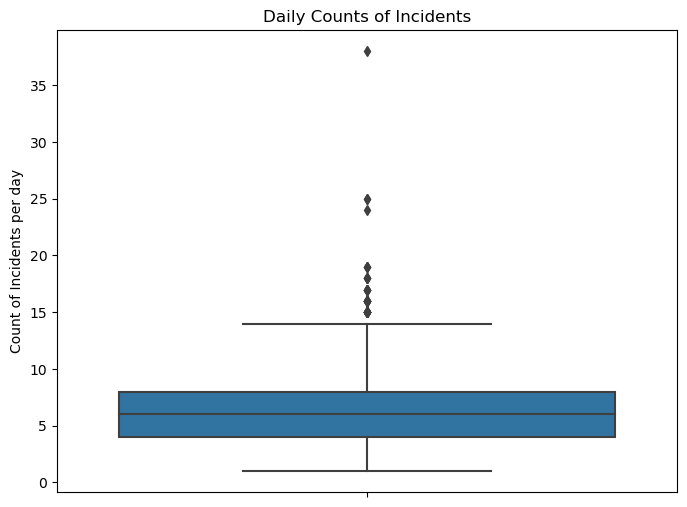

In [20]:
# Display the days with high incident numbers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df.groupby("date")['date'].value_counts())
plt.title('Daily Counts of Incidents')
plt.ylabel('Count of Incidents per day')
plt.show()

In [21]:
df.date

0        2013-01-01
1        2013-01-01
2        2013-01-01
3        2014-01-01
4        2014-01-01
            ...    
12812    2017-09-09
12813    2017-09-09
12814    2017-09-09
12815    2018-09-09
12816    2018-09-09
Name: date, Length: 12714, dtype: object

In [22]:
df.date.nunique()

2057

In [23]:
ramadan_10_days (df)

Total number of days: 2109
---------------------
Total number of cases: 12714
----------------------
Average Daily Case Count: 6.03
-------------------------
Yearly case counts according to the Gregorian calendar:
-------------------------------------------------------
2017    2491
2015    2268
2014    2239
2016    2224
2013    2109
2018    1383
Name: date, dtype: int64
--------------------------------------------
Case counts according to the Hijri calendar:
--------------------------------------------
1438    2385
1435    2157
1437    2135
1436    2123
1439    1973
1434    1779
1440     162
Name: Hijri_Date, dtype: int64
----------------------------------------------------------
Average case count in the last ten days of Ramadan months: 4.1
----------------------------------------------------------
Average case count in other days: 6.0849
---------------------------------
Ratio of Ramadan cases to other cases: 0.6738
--------------------------------------


***We observe a -32.68% lower crime rate during the last 10 days of the Ramadan month compared to the annual average.***

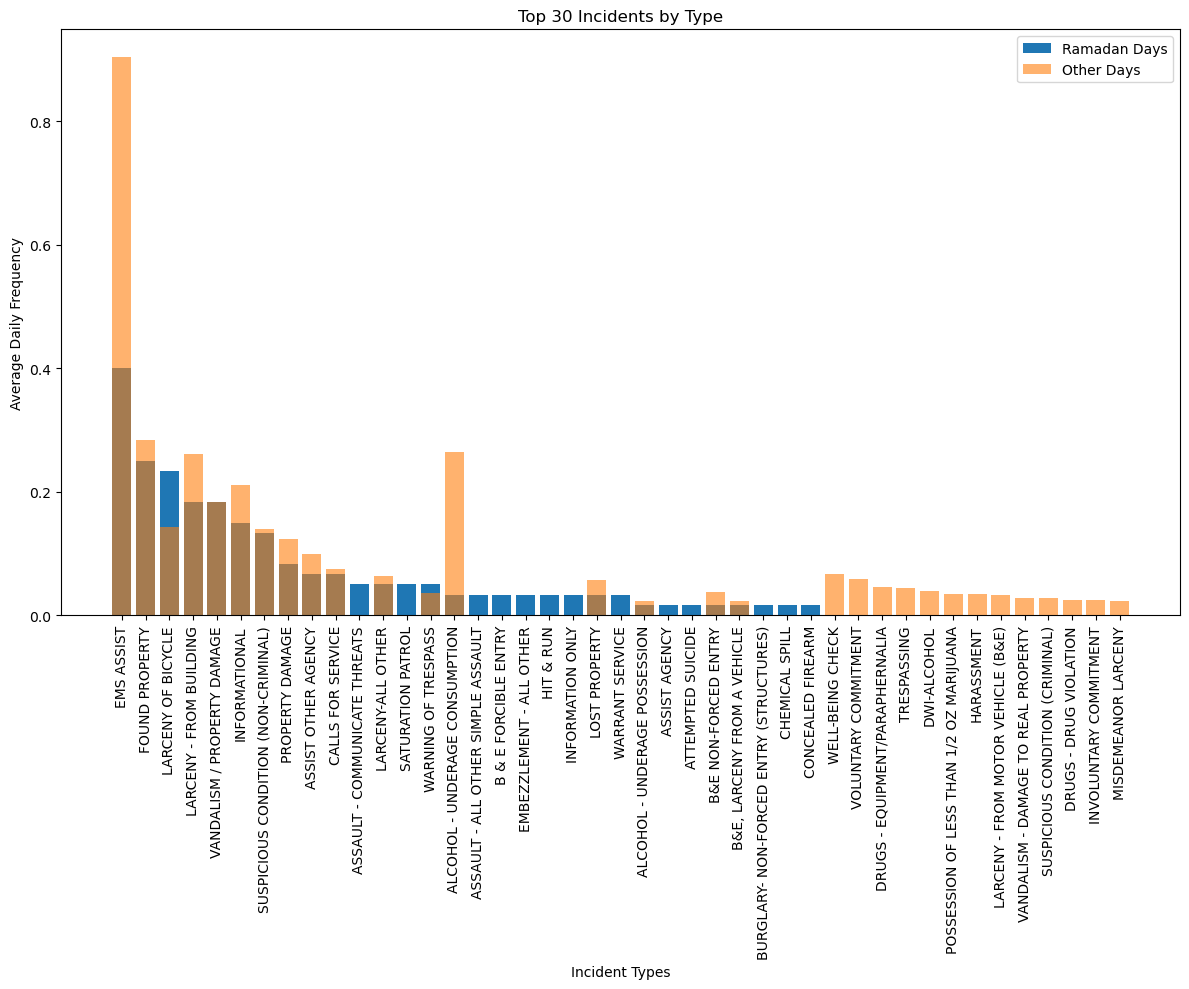

In [24]:
sorted_ratios, ramadan_dominant_incidents, ramadan_incidents_desc, other_days_incidents_desc  = incidents_by_types(df)

In [25]:
# Top 30 incident types sorted by "ramadan incidents / total incidents" ratio
sorted_ratios

,ramadan incidents,all incidents,ramadan incidents/total incidents
LARCENY-PARKING SIGN,1,1,1.000000
POSSESS AND CONSUME MALT BEVERAGE ON ED,1,1,1.000000
INFORMATIION REPORT,1,1,1.000000
TRANSPORTING AFTER CONSUMING OPEN CONTAINER,1,1,1.000000
LARCENY-CREDIT CARD,1,1,1.000000
CONCEALED FIREARM,1,1,1.000000
MEDICAL TRANSPORT,1,1,1.000000
G.S 14-269.2(D) POSSESS WEAPON ON EDUCATIONAL PROPERTY,1,1,1.000000
UNAUTHORIZED USE OF A MOTORIZED CONVEYANCE,1,1,1.000000
POWER LINE FIRE,1,1,1.000000


In [26]:
# In which categories were more crimes committed during the last ten days of Ramadan?
ramadan_dominant_incidents

,ramadan incidents,all incidents,ramadan incidents/total incidents
LARCENY OF BICYCLE,14,306,0.0458
WARNING OF TRESPASS,3,76,0.0395
SATURATION PATROL,3,50,0.0600
ASSAULT - COMMUNICATE THREATS,3,35,0.0857
EMBEZZLEMENT - ALL OTHER,2,5,0.4000
INFORMATION ONLY,2,11,0.1818
HIT & RUN,2,3,0.6667
ASSAULT - ALL OTHER SIMPLE ASSAULT,2,49,0.0408
WARRANT SERVICE,2,13,0.1538
B & E FORCIBLE ENTRY,2,45,0.0444


In [27]:
df.incident.nunique(), ramadan_dominant_incidents.count()[0]

(730, 40)

In [28]:
ramadan_incidents_desc

count            175
unique            64
top       EMS ASSIST
freq              24
Name: incident, dtype: object

In [29]:
other_days_incidents_desc

count           9343
unique           718
top       EMS ASSIST
freq            1851
Name: incident, dtype: object

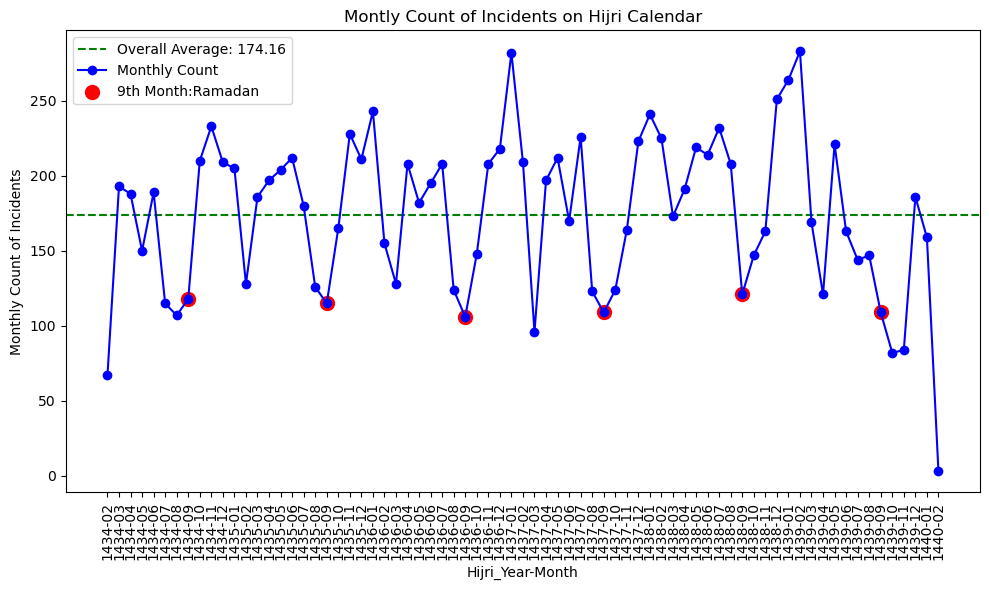

In [30]:
monthly_count_plot()

# SAMPLE DATA-2: LOS ANGELES CRIME DATA_2010-2019

https://www.kaggle.com/datasets/cityofLA/los-angeles-crime-arrest-data/?select=crime-data-from-2010-to-present.csv

In [31]:
df = pd.read_csv("Los_Angles_crime-data-from-2010-to-present.csv")
df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,102005556,2010-01-25T00:00:00,2010-01-22T00:00:00,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"{'latitude': '34.0454', 'needs_recoding': Fals..."
1,101822289,2010-11-11T00:00:00,2010-11-10T00:00:00,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"{'latitude': '33.9572', 'needs_recoding': Fals..."
2,101105609,2010-01-28T00:00:00,2010-01-27T00:00:00,2230,11,Northeast,1125,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,YORK,AVENUE 51,"{'latitude': '34.1211', 'needs_recoding': Fals..."
3,101620051,2010-11-11T00:00:00,2010-11-07T00:00:00,1600,16,Foothill,1641,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,EL DORADO,TRUESDALE,"{'latitude': '34.241', 'needs_recoding': False..."
4,101910498,2010-04-07T00:00:00,2010-04-07T00:00:00,1600,19,Mission,1902,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,GLENOAKS,DRELL,"{'latitude': '34.3147', 'needs_recoding': Fals..."


In [32]:
df.duplicated().value_counts()

False    1993259
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993259 entries, 0 to 1993258
Data columns (total 26 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   DR Number               int64  
 1   Date Reported           object 
 2   Date Occurred           object 
 3   Time Occurred           int64  
 4   Area ID                 int64  
 5   Area Name               object 
 6   Reporting District      int64  
 7   Crime Code              int64  
 8   Crime Code Description  object 
 9   MO Codes                object 
 10  Victim Age              int64  
 11  Victim Sex              object 
 12  Victim Descent          object 
 13  Premise Code            float64
 14  Premise Description     object 
 15  Weapon Used Code        float64
 16  Weapon Description      object 
 17  Status Code             object 
 18  Status Description      object 
 19  Crime Code 1            float64
 20  Crime Code 2            float64
 21  Crime Code 3            float64

In [34]:
df = pd.read_csv("Los_Angles_crime-data-from-2010-to-present.csv", usecols=[0,2,8])

In [35]:
df["Crime Code Description"].value_counts()[:15]

BATTERY - SIMPLE ASSAULT                                    180434
BURGLARY FROM VEHICLE                                       153451
VEHICLE - STOLEN                                            151622
THEFT PLAIN - PETTY ($950 & UNDER)                          141489
BURGLARY                                                    140926
THEFT OF IDENTITY                                           120835
INTIMATE PARTNER - SIMPLE ASSAULT                           107900
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     102589
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               86829
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                     86440
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)              82791
ROBBERY                                                      79392
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     70081
CRIMINAL THREATS - NO WEAPON DISPLAYED                       53959
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                     4

In [36]:
df = df.rename(columns = {'Date Occurred':'date'})
df = df.rename(columns = {'Crime Code Description':'incident'})

In [37]:
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

In [38]:
min(df.date), max(df.date)

('2010-01-01', '2019-06-22')

In [39]:
daily_incident_counts_stats = df.groupby("date")['date'].value_counts().describe([.25, .5, .75, .95, .98, .99]).astype(int)
daily_incident_counts_stats

count    3460
mean      576
std        89
min       390
25%       528
50%       568
75%       610
95%       683
98%       820
99%       854
max      2222
Name: date, dtype: int32

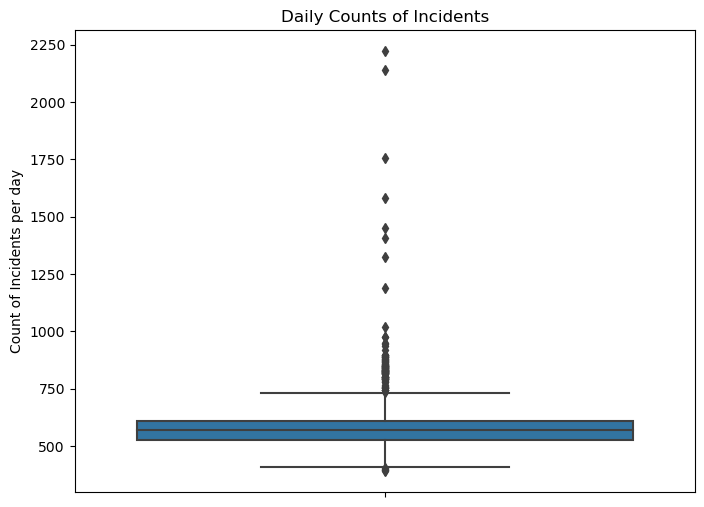

In [40]:
# Display the days with high incident numbers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df.groupby("date")['date'].value_counts())
plt.title('Daily Counts of Incidents')
plt.ylabel('Count of Incidents per day')
plt.show()

In [41]:
df.date.nunique()

3460

In [42]:
ramadan_10_days (df)

Total number of days: 3460
---------------------
Total number of cases: 1993259
----------------------
Average Daily Case Count: 576.09
-------------------------
Yearly case counts according to the Gregorian calendar:
-------------------------------------------------------
2017    229930
2018    226909
2016    224645
2015    214822
2010    208823
2012    201170
2011    200437
2014    195022
2013    192211
2019     99290
Name: date, dtype: int64
--------------------------------------------
Case counts according to the Hijri calendar:
--------------------------------------------
1439    222769
1438    221164
1437    215516
1436    205095
1433    195939
1431    195346
1432    194561
1434    188032
1435    186913
1440    167924
Name: Hijri_Date, dtype: int64
----------------------------------------------------------
Average case count in the last ten days of Ramadan months: 557.43
----------------------------------------------------------
Average case count in other days: 576.6417
--------

***We observe a -3.33% lower crime rate during the last 10 days of the Ramadan month compared to the annual average.***

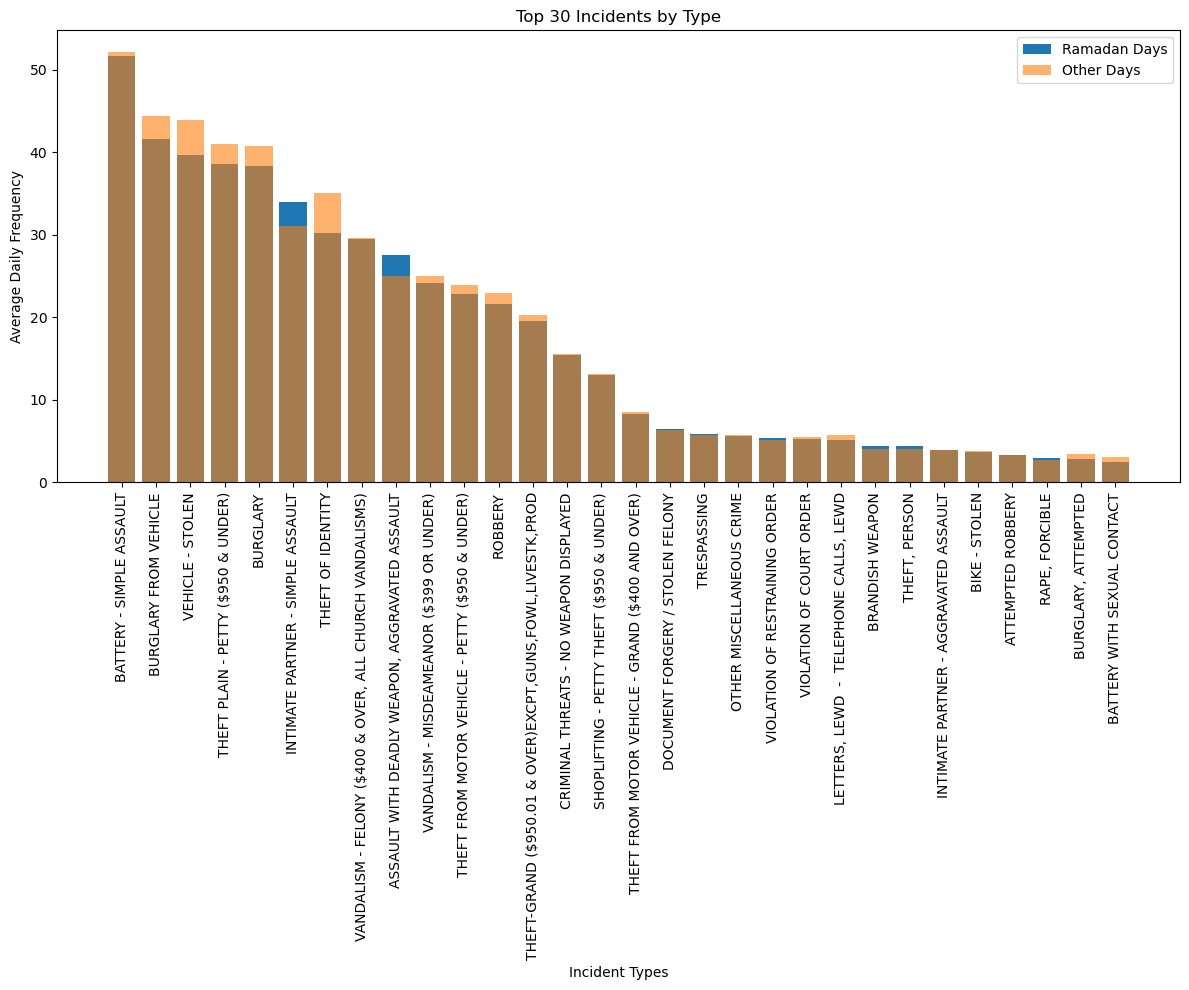

In [43]:
sorted_ratios, ramadan_dominant_incidents, ramadan_incidents_desc, other_days_incidents_desc  = incidents_by_types(df)

In [44]:
# Top 30 incident types sorted by "ramadan incidents / total incidents" ratio
sorted_ratios

,ramadan incidents,all incidents,ramadan incidents/total incidents
ABORTION/ILLEGAL,1,7,0.142900
DISHONEST EMPLOYEE ATTEMPTED THEFT,1,9,0.111100
FAILURE TO DISPERSE,2,20,0.100000
LYNCHING - ATTEMPTED,2,23,0.087000
BIGAMY,1,13,0.076900
CONSPIRACY,3,54,0.055600
BIKE - ATTEMPTED STOLEN,2,37,0.054100
"DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $400",11,230,0.047800
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,4,87,0.046000
"PICKPOCKET, ATTEMPT",1,22,0.045500


In [45]:
# In which categories were more crimes committed during the last ten days of Ramadan?
ramadan_dominant_incidents

,ramadan incidents,all incidents,ramadan incidents/total incidents
INTIMATE PARTNER - SIMPLE ASSAULT,3402,107900,0.0315
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2754,86829,0.0317
DOCUMENT FORGERY / STOLEN FELONY,643,21940,0.0293
TRESPASSING,584,19965,0.0293
VIOLATION OF RESTRAINING ORDER,533,17948,0.0297
"THEFT, PERSON",436,13884,0.0314
BRANDISH WEAPON,436,13863,0.0315
ATTEMPTED ROBBERY,330,11361,0.0290
"RAPE, FORCIBLE",290,9583,0.0303
BATTERY POLICE (SIMPLE),148,4571,0.0324


In [46]:
df.incident.nunique(), ramadan_dominant_incidents.count()[0]

(140, 54)

In [47]:
ramadan_incidents_desc

count                        55743
unique                         122
top       BATTERY - SIMPLE ASSAULT
freq                          5168
Name: incident, dtype: object

In [48]:
other_days_incidents_desc

count                      1937516
unique                         140
top       BATTERY - SIMPLE ASSAULT
freq                        175266
Name: incident, dtype: object

Los Angeles dataset encompasses 140 distinct incident types. During the last ten days of Ramadan, crimes were committed across 122 incident categories, with 54 of these categories experiencing incident counts exceeding the annual averages.

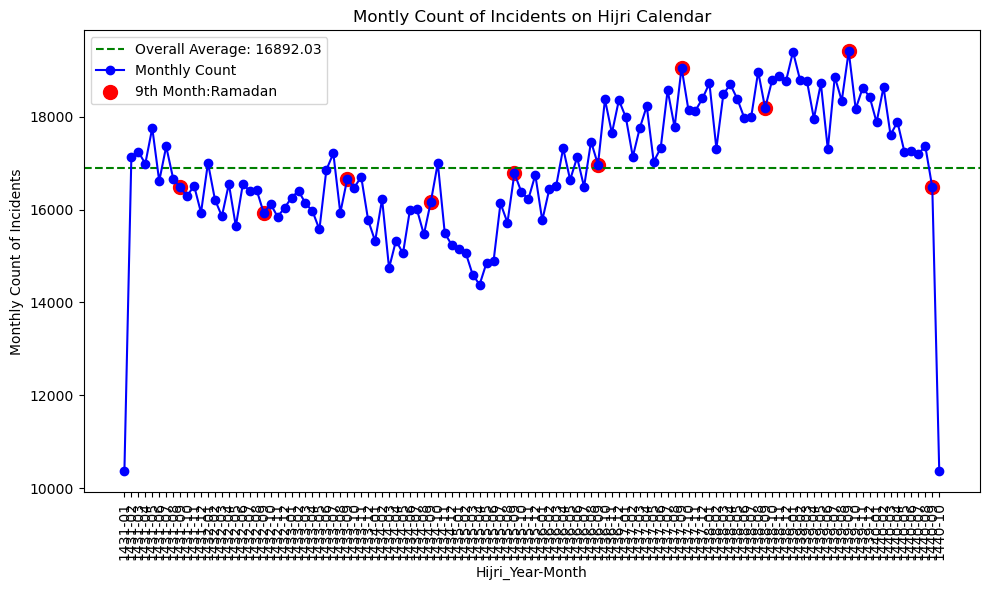

In [49]:
monthly_count_plot()

# SAMPLE DATA-3: KANSAS CITY CRIME DATA_2009-2016

https://data.world/data-society/kansas-city-crime-data

In [50]:
df2 = pd.read_csv("KCPD_Crime_Data_2009.csv")
df3 = pd.read_csv("KCPD_Crime_Data_2010.csv")
df4 = pd.read_csv("KCPD_Crime_Data_2011.csv")
df5 = pd.read_csv("KCPD_Crime_Data_2012.csv")
df6 = pd.read_csv("KCPD_Crime_Data_2013.csv")
df7 = pd.read_csv("KCPD_Crime_Data_2014.csv")
df8 = pd.read_csv("KCPD_Crime_Data_2015.csv")
df9 = pd.read_csv("KCPD_Crime_Data_2016.csv")

In [51]:
frames = [df2, df3, df4, df5, df6, df7, df8, df9]
df = pd.concat(frames)

In [52]:
df.head()

,Report_No,Reported_Date,Reported Time,From_Date,From Time,To_Date,To Time,Offense,IBRS,Description,...,Involvement,Race,Sex,Age,Location 1,Firearm Used Flag,Firearm Used Flag,Reported_Time,From_Time,To_Time
0,70059279,10/06/2009 12:00:00 AM,3:24,10/05/2009 12:00:00 AM,22:56,10/05/2009 12:00:00 AM,23:10,1850,35B,Possession of Drug E,...,ARR,B,F,28.0,"PROSPECT AV VICTOR ST KANSAS CITY, MO 64128\n(...",N,NaN,NaN,NaN,NaN
1,80005443,02/05/2009 12:00:00 AM,11:45,01/22/2008 12:00:00 AM,12:00,NaN,NaN,121,09C,Justifiable Homicide,...,SUS,W,M,27.0,"1100 LOCUST ST\nKANSAS CITY, MO 64106\n(39.100...",Y,NaN,NaN,NaN,NaN
2,80019629,06/18/2009 12:00:00 AM,22:50,06/18/2009 12:00:00 AM,21:15,NaN,NaN,1849,35A,Possession/Sale/Dist,...,ARR,W,M,22.0,"100 WHEELING AV\nKANSAS CITY, MO 64129\n(39.11...",N,NaN,NaN,NaN,NaN
3,70060962,01/28/2009 12:00:00 AM,18:44,01/28/2009 12:00:00 AM,18:44,NaN,NaN,1352,280,Stolen Property OFFE,...,VIC,U,U,NaN,"44 ST INDIANA AV\nKANSAS CITY, MO 64130\n(39.0...",N,NaN,NaN,NaN,NaN
4,80005443,02/05/2009 12:00:00 AM,11:45,01/22/2008 12:00:00 AM,12:00,NaN,NaN,121,09C,Justifiable Homicide,...,SUS,W,M,28.0,"1100 LOCUST ST\nKANSAS CITY, MO 64106\n(39.100...",Y,NaN,NaN,NaN,NaN


In [53]:
df.duplicated().value_counts()

False    1007956
True        3518
dtype: int64

In [54]:
df = df.drop_duplicates()

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007956 entries, 0 to 110891
Data columns (total 28 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Report_No            1007956 non-null  int64  
 1   Reported_Date        1007956 non-null  object 
 2   Reported Time        897459 non-null   object 
 3   From_Date            1006558 non-null  object 
 4   From Time            895625 non-null   object 
 5   To_Date              422549 non-null   object 
 6   To Time              378834 non-null   object 
 7   Offense              1007956 non-null  int64  
 8   IBRS                 999468 non-null   object 
 9   Description          1007956 non-null  object 
 10  Beat                 1006287 non-null  object 
 11  Address              883108 non-null   object 
 12  City                 883108 non-null   object 
 13  Zip Code             976536 non-null   float64
 14  Rep_Dist             1005055 non-null  object 
 15 

In [56]:
df["Description"].value_counts()[:15]

Burglary - Residence    93609
Property Damage         87921
Stealing From Auto      68821
Non Agg Assault Dome    63608
Auto Theft              61302
Stealing Auto Parts/    52498
Non Aggravated Assau    52272
Misc Violation          51407
Stealing Shoplifting    46401
Stealing from Buildi    43149
Stealing All Other      41074
Aggravated Assault (    40332
Possession/Sale/Dist    34013
Armed Robbery           30324
Trespassing             23800
Name: Description, dtype: int64

In [57]:
df = df.rename(columns = {'Reported_Date':'date'})
df = df.rename(columns = {'Description':'incident'})

In [58]:
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

In [59]:
df.date.min(), df.date.max()

('2009-01-01', '2016-11-06')

In [60]:
df = df.iloc[:, [1,9]]
# df.to_csv("Kansas.csv", index=False)

In [61]:
daily_incident_counts_stats = df.groupby("date")['date'].value_counts().describe([.25, .5, .75, .95, .98, .99]).astype(int)
daily_incident_counts_stats

count    2858
mean      352
std        58
min        62
25%       316
50%       354
75%       392
95%       443
98%       468
99%       484
max       539
Name: date, dtype: int32

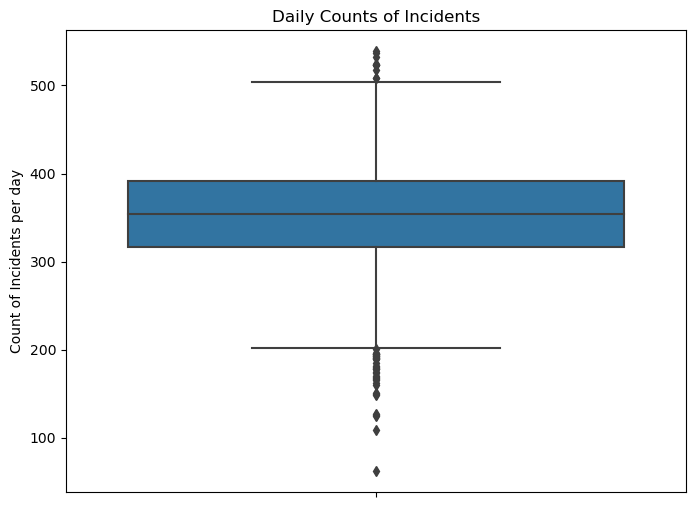

In [62]:
# Display the days with high incident numbers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df.groupby("date")['date'].value_counts())
plt.title('Daily Counts of Incidents')
plt.ylabel('Count of Incidents per day')
plt.show()

In [63]:
df.date.nunique()

2858

In [64]:
ramadan_10_days (df)

Total number of days: 2867
---------------------
Total number of cases: 1007956
----------------------
Average Daily Case Count: 351.57
-------------------------
Yearly case counts according to the Gregorian calendar:
-------------------------------------------------------
2010    136056
2009    132535
2012    130290
2011    128072
2013    124732
2014    124232
2015    121542
2016    110497
Name: date, dtype: int64
--------------------------------------------
Case counts according to the Hijri calendar:
--------------------------------------------
1431    131791
1430    128579
1433    126531
1434    126102
1432    124047
1437    123207
1435    117771
1436    117002
1438     12926
Name: Hijri_Date, dtype: int64
----------------------------------------------------------
Average case count in the last ten days of Ramadan months: 367.325
----------------------------------------------------------
Average case count in other days: 351.1195
---------------------------------
Ratio of Ramadan c

***We observe a 4.62% higher crime rate during the last 10 days of the Ramadan month compared to the annual average.***

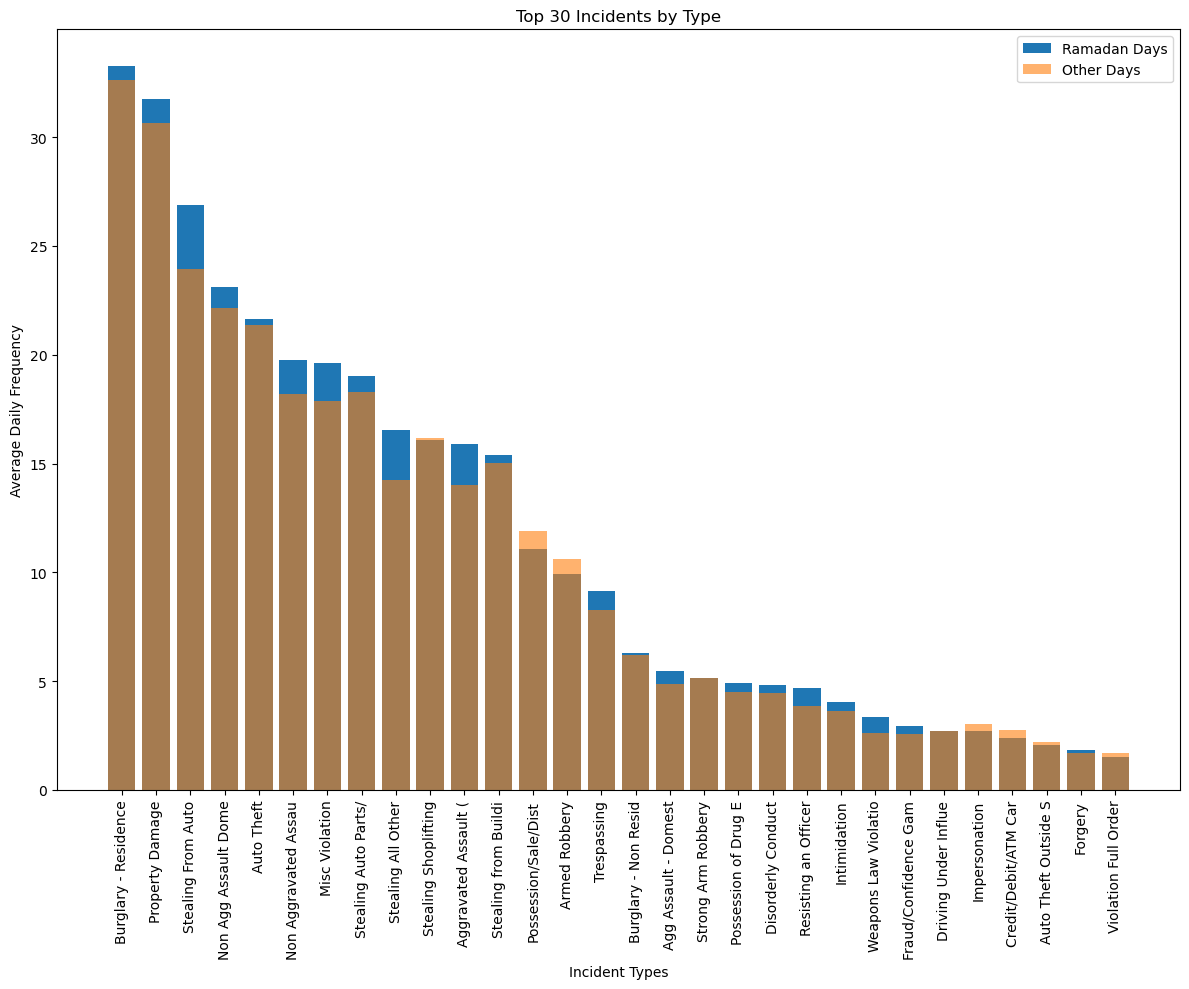

In [65]:
sorted_ratios, ramadan_dominant_incidents, ramadan_incidents_desc, other_days_incidents_desc  = incidents_by_types(df)
# display(sorted_ratios)
# display(ramadan_dominant_incidents)

In [66]:
# Top 30 incident types sorted by "ramadan incidents / total incidents" ratio
sorted_ratios

,ramadan incidents,all incidents,ramadan incidents/total incidents
Intoxicated/Street,2,2,1.000000
Resisting an officer,2,2,1.000000
non agg assault,4,4,1.000000
disorderly conduct,4,4,1.000000
\,2,2,1.000000
trespassing,2,2,1.000000
intimidation,2,4,0.500000
Harassment,2,4,0.500000
Accidental Drug Over,2,8,0.250000
Sexual Assault with,5,28,0.178600


In [67]:
# In which categories were more crimes committed during the last ten days of Ramadan?
ramadan_dominant_incidents

,ramadan incidents,all incidents,ramadan incidents/total incidents
Burglary - Residence,2663,93609,0.0284
Property Damage,2541,87921,0.0289
Stealing From Auto,2150,68821,0.0312
Non Agg Assault Dome,1849,63608,0.0291
Auto Theft,1731,61302,0.0282
Non Aggravated Assau,1580,52272,0.0302
Misc Violation,1571,51407,0.0306
Stealing Auto Parts/,1521,52498,0.0290
Stealing All Other,1324,41074,0.0322
Aggravated Assault (,1273,40332,0.0316


In [68]:
df.incident.nunique(), ramadan_dominant_incidents.count()[0]

(259, 59)

In [69]:
ramadan_incidents_desc

count                    29386
unique                      95
top       Burglary - Residence
freq                      2663
Name: incident, dtype: object

In [70]:
other_days_incidents_desc

count                   978570
unique                     253
top       Burglary - Residence
freq                     90946
Name: incident, dtype: object

In [71]:
ramadan_dominant_incidents.count()[0]

59

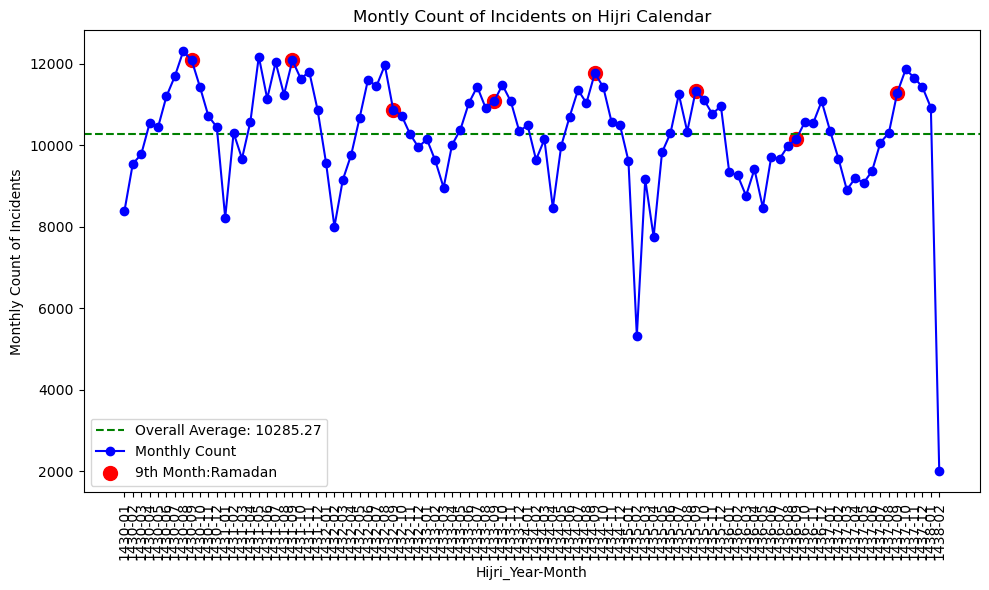

In [72]:
monthly_count_plot()

# SAMPLE DATA-4: DETROIT CRIME INCIDENTS_2009-2016

https://data.world/detroit/dpd-crime-incidents-2009-2016

In [73]:
df = pd.read_csv("Detroit_crime-incidents-2009-2016.csv", index_col=0, low_memory=False)
df

,CASEID,CRIMEID,CRNO,ADDRESS,CATEGORY,OFFENSEDESCRIPTION,STATEOFFENSEFILECLASS,INCIDENTDATE,HOUR,SCA,PRECINCT,COUNCIL,NEIGHBORHOOD,CENSUSTRACT,LON,LAT,LOCATION
ROWNUM,,,,,,,,,,,,,,,,,
1,1099487,1321797,0910020373.1,18000 WEXFORD,MISCELLANEOUS,MISCELLANEOUS - GENERAL NON-CRIMINAL,99009.0,01/01/2009,0,1107.0,11.0,City Council District 3,CONANT GARDENS,5070.0,-83.0649,42.4261,"WEXFORD\n18000\n(42.4263, -83.0652)"
2,1117507,1344185,0911060289.1,00 UNKNOWN,MISCELLANEOUS,MISCELLANEOUS - GENERAL NON-CRIMINAL,99009.0,01/01/2009,0,NaN,NaN,NaN,NaN,9999999.0,999999.0001,999999.0000,"00 UNKNOWN\n(999999.0001, 999998.9999)"
3,985415,1181882,0902190512.1,02000 CALVERT,MISCELLANEOUS,MISCELLANEOUS - ABANDONED VEHICLE,99009.0,01/01/2009,0,1005.0,10.0,City Council District 5,PECK,5313.0,-83.1058,42.3821,"CALVERT\n02000\n(42.3821, -83.1056)"
4,986019,1182632,0902200294.1,00 W GRAND BLVD AND W FORT,MISCELLANEOUS,MISCELLANEOUS - GENERAL NON-CRIMINAL,99009.0,01/01/2009,0,414.0,4.0,City Council District 6,HUBBARD-RICHARD,5211.0,-83.0830,42.3145,"00 W GRAND BLVD AND W FORT\n(42.3146, -83.0831)"
5,996883,1195867,0903170149.1,12500 CONNER,LARCENY,"LARCENY - FROM BUILDING (INCLUDES LIBRARY, OFF...",23003.0,01/01/2009,0,908.0,9.0,City Council District 3,BURBANK,5052.0,-83.0080,42.4134,"CONNER\n12500\n(42.4134, -83.0079)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150376,2104068,2593922,1606250233.1,00 WOODWARD AND WEBB,DANGEROUS DRUGS,COCAINE -POSSESS,35001.0,06/25/2016,17,301.0,3.0,NaN,NaN,5114.0,-83.0884,42.3926,"00 WOODWARD AND WEBB\n(42.3926, -83.0884)"
1150499,2104173,2594059,1606260030.1,20100 STANSBURY,MISCELLANEOUS,MISCELLANEOUS - GENERAL ASSISTANCE,99008.0,06/26/2016,1,1201.0,12.0,NaN,NaN,5392.0,-83.1848,42.4414,"20100 STANSBURY\n(42.4414, -83.1848)"
1150527,2104193,2594076,1606260049.1,12100 FORRER,BURGLARY,BURGLARY - BURGLARY - FORCED ENTRY - RESIDENCE,22001.0,06/26/2016,3,605.0,6.0,NaN,NaN,5451.0,-83.2017,42.3762,"12100 FORRER\n(42.3762, -83.2017)"


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1151019 entries, 1 to 1150712
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   CASEID                 1151019 non-null  int64  
 1   CRIMEID                1151019 non-null  int64  
 2   CRNO                   1151019 non-null  object 
 3   ADDRESS                1151019 non-null  object 
 4   CATEGORY               1151019 non-null  object 
 5   OFFENSEDESCRIPTION     1150959 non-null  object 
 6   STATEOFFENSEFILECLASS  1150959 non-null  float64
 7   INCIDENTDATE           1151019 non-null  object 
 8   HOUR                   1151019 non-null  int64  
 9   SCA                    1142973 non-null  float64
 10  PRECINCT               1142973 non-null  float64
 11  COUNCIL                1127234 non-null  object 
 12  NEIGHBORHOOD           1136581 non-null  object 
 13  CENSUSTRACT            1072395 non-null  float64
 14  LON               

In [75]:
df.duplicated().value_counts()

False    1151019
dtype: int64

In [76]:
df["CATEGORY"].value_counts()

MISCELLANEOUS             174164
ASSAULT                   141608
LARCENY                   133666
BURGLARY                  109073
DAMAGE TO PROPERTY         93781
STOLEN VEHICLE             89445
AGGRAVATED ASSAULT         72577
MURDER/INFORMATION         71694
TRAFFIC                    63890
FRAUD                      40357
ROBBERY                    39292
DANGEROUS DRUGS            28081
ESCAPE                     13617
WEAPONS OFFENSES           13268
OBSTRUCTING JUDICIARY      11345
DISORDERLY CONDUCT          9252
OUIL                        8557
ARSON                       6891
SOLICITATION                3872
OBSTRUCTING THE POLICE      3268
STOLEN PROPERTY             3249
OTHER                       3135
OTHER BURGLARY              3065
HOMICIDE                    2541
FAMILY OFFENSE              1997
FORGERY                     1609
KIDNAPING                   1588
RUNAWAY                     1457
VAGRANCY (OTHER)            1138
EXTORTION                   1099
LIQUOR    

In [77]:
df["OFFENSEDESCRIPTION"].value_counts()

ASSAULT AND BATTERY/SIMPLE ASSAULT                          98560
VEHICLE THEFT                                               82957
INFORMATION                                                 71694
DAMAGE TO PROPERTY - PRIVATE PROPERTY                       68202
BURGLARY - BURGLARY - FORCED ENTRY - RESIDENCE              67025
                                                            ...  
ARSON - BUSINESS - DEFRAUD INSURER                              1
TRAFFIC VIOLATIONS - ILLEGAL TOWING EQUIPMENT                   1
PERMITTED PERSON UNDER THE INFLUENCE OF DRUGS TO OPERATE        1
TRAFFIC VIOLATIONS - DEFECTIVE OR IMPROPER BRAKES               1
ACCIDENTS, ALL OTHER NON-CRIMINAL - AIRCRAFT                    1
Name: OFFENSEDESCRIPTION, Length: 584, dtype: int64

In [78]:
df = df.rename(columns = {'INCIDENTDATE':'date'})
df = df.rename(columns = {'CATEGORY':'incident'})

In [79]:
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

In [80]:
df.date.min(), df.date.max()

('2009-01-01', '2016-06-28')

In [81]:
df = df.iloc[:, [4,7]]
# df.to_csv("Detroit.csv", index=False)

In [82]:
daily_incident_counts_stats = df.groupby("date")['date'].value_counts().describe([.25, .5, .75, .95, .98, .99]).astype(int)
daily_incident_counts_stats

count    2736
mean      420
std        68
min         1
25%       374
50%       417
75%       465
95%       539
98%       565
99%       584
max       655
Name: date, dtype: int32

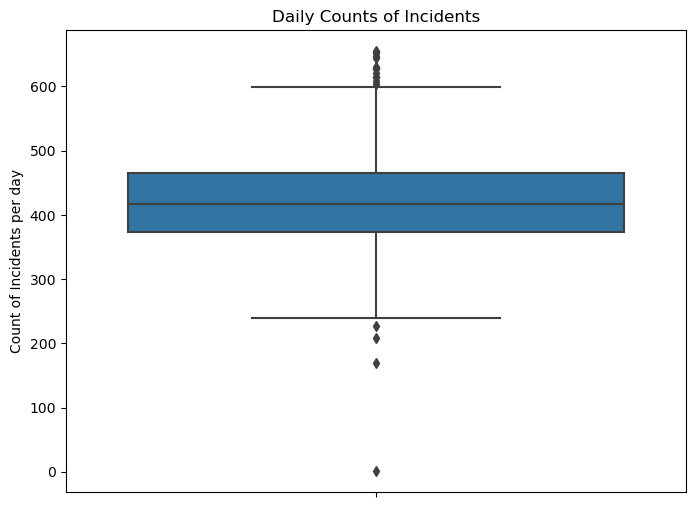

In [83]:
# Display the days with high incident numbers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df.groupby("date")['date'].value_counts())
plt.title('Daily Counts of Incidents')
plt.ylabel('Count of Incidents per day')
plt.show()

In [84]:
df.date.nunique()

2736

In [85]:
ramadan_10_days(df)

Total number of days: 2736
---------------------
Total number of cases: 1151019
----------------------
Average Daily Case Count: 420.69
-------------------------
Yearly case counts according to the Gregorian calendar:
-------------------------------------------------------
2009    181681
2010    170599
2011    157248
2012    156133
2013    146908
2015    137044
2014    136628
2016     64778
Name: date, dtype: int64
--------------------------------------------
Case counts according to the Hijri calendar:
--------------------------------------------
1430    175663
1431    166733
1433    153006
1432    152251
1434    144344
1435    132697
1436    132393
1437     93932
Name: Hijri_Date, dtype: int64
----------------------------------------------------------
Average case count in the last ten days of Ramadan months: 385.275
----------------------------------------------------------
Average case count in other days: 421.7609
---------------------------------
Ratio of Ramadan cases to other c

***We observe a -8.65% lower crime rate during the last 10 days of the Ramadan month compared to the annual average.***

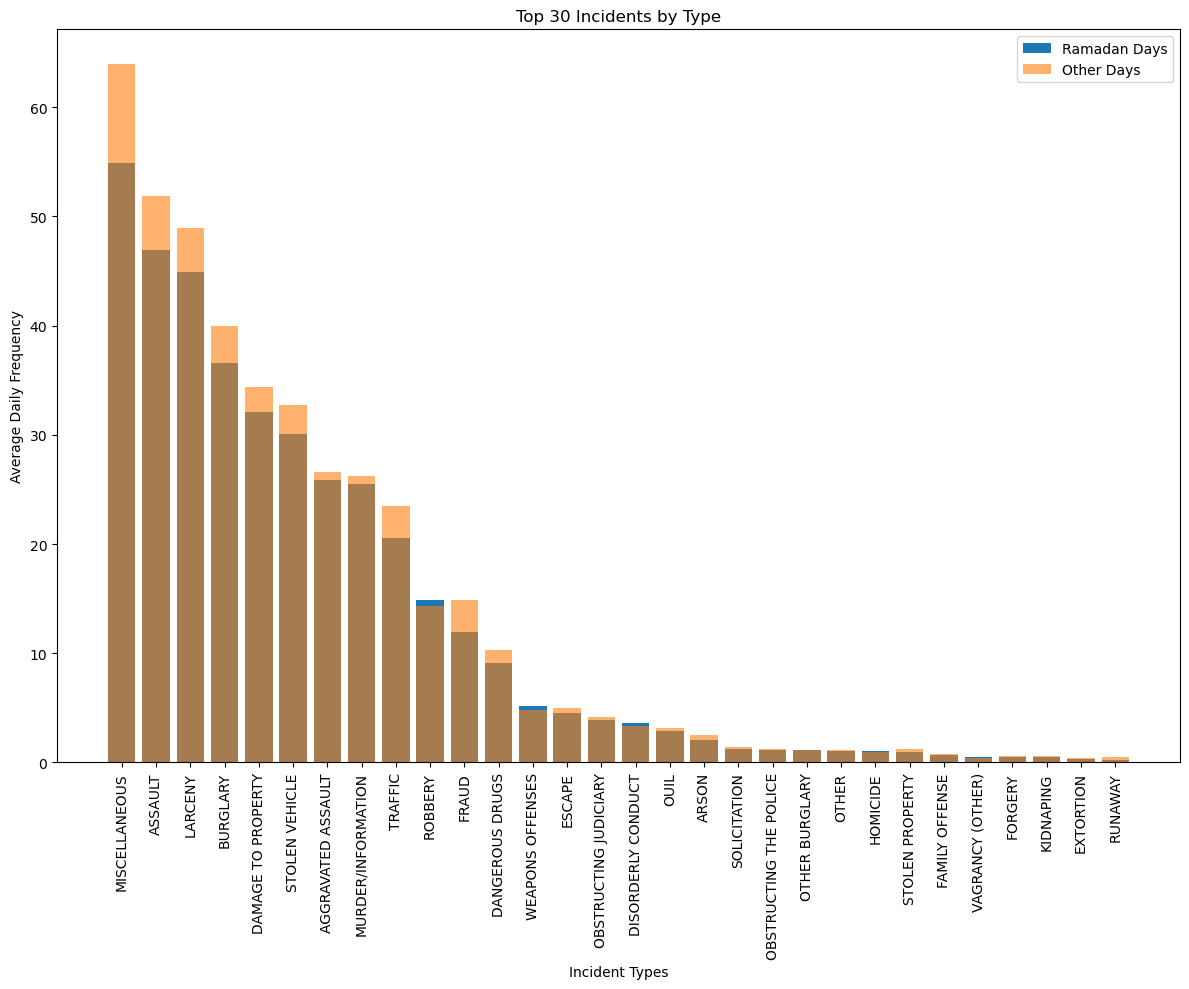

In [86]:
sorted_ratios, ramadan_dominant_incidents, ramadan_incidents_desc, other_days_incidents_desc  = incidents_by_types(df)
# display(sorted_ratios)
# display(ramadan_dominant_incidents)

In [87]:
# Top 30 incident types sorted by "ramadan incidents / total incidents" ratio
sorted_ratios

,ramadan incidents,all incidents,ramadan incidents/total incidents
BRIBERY,2,19,0.105300
GAMBLING,3,39,0.076900
MISCELLANEOUS ARREST,1,17,0.058800
VAGRANCY (OTHER),43,1138,0.037800
EMBEZZLEMENT,13,346,0.037600
HOMICIDE,83,2541,0.032700
WEAPONS OFFENSES,416,13268,0.031400
DISORDERLY CONDUCT,290,9252,0.031300
ROBBERY,1188,39292,0.030200
OBSTRUCTING THE POLICE,95,3268,0.029100


In [88]:
# In which categories were more crimes committed during the last ten days of Ramadan?
ramadan_dominant_incidents

,ramadan incidents,all incidents,ramadan incidents/total incidents
ROBBERY,1188,39292,0.0302
WEAPONS OFFENSES,416,13268,0.0314
DISORDERLY CONDUCT,290,9252,0.0313
HOMICIDE,83,2541,0.0327
VAGRANCY (OTHER),43,1138,0.0378
EMBEZZLEMENT,13,346,0.0376
GAMBLING,3,39,0.0769
BRIBERY,2,19,0.1053
MISCELLANEOUS ARREST,1,17,0.0588


In [89]:
df.incident.nunique(), ramadan_dominant_incidents.count()[0]

(46, 9)

In [90]:
ramadan_incidents_desc

count             30822
unique               39
top       MISCELLANEOUS
freq               4391
Name: incident, dtype: object

In [91]:
other_days_incidents_desc

count           1120197
unique               46
top       MISCELLANEOUS
freq             169773
Name: incident, dtype: object

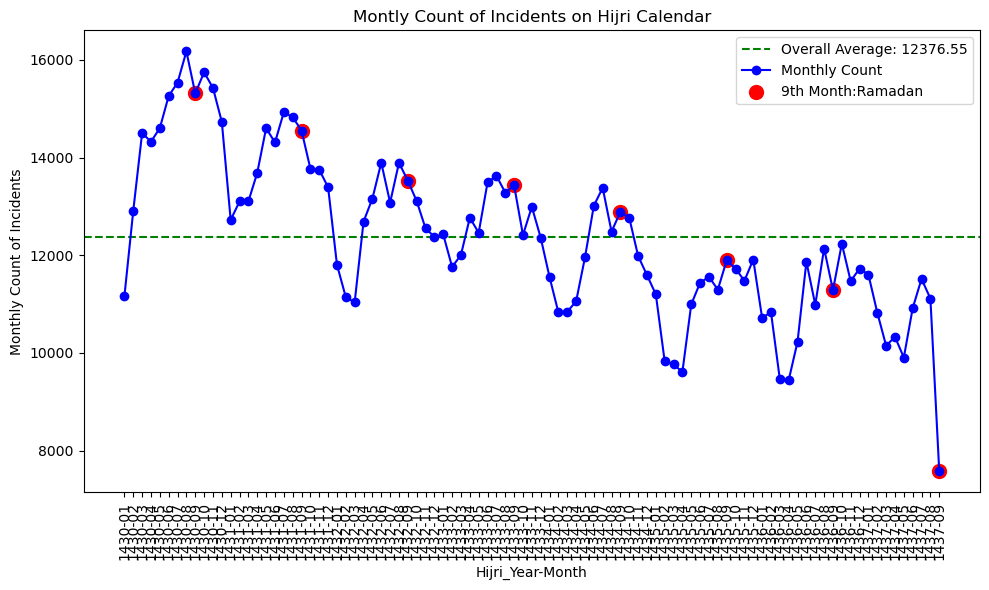

In [92]:
monthly_count_plot()

# SAMPLE DATA-5: DENVER CRIME DATASET_2019-2023

https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-crime

In [93]:
df = pd.read_csv("denver_crime.csv", index_col=0, encoding="Latin-1", low_memory=False) 
df

,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,incident_address,geo_x,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,is_crime,is_traffic,victim_count
incident_id,,,,,,,,,,,,,,,,,,,
202268791,202268791299900,2999,0,criminal-mischief-other,public-disorder,2/10/2022 2:50:00 AM,NaN,2/10/2022 3:16:00 AM,1107 N SANTA FE DR,3140929.0,1692612.0,-104.998910,39.733957,1,123,lincoln-park,1,0,1
2021387586,2021387586299900,2999,0,criminal-mischief-other,public-disorder,7/7/2021 9:02:00 PM,NaN,7/8/2021 12:55:00 AM,815 16TH ST,3142470.0,1697098.0,-104.993342,39.746248,6,611,cbd,1,0,1
2020641486,2020641486299900,2999,0,criminal-mischief-other,public-disorder,10/29/2020 1:30:00 AM,NaN,10/29/2020 4:31:00 AM,4745 N FEDERAL BLVD,3133352.0,1710396.0,-105.025520,39.782888,1,111,berkeley,1,0,1
2018612468,2018612468299900,2999,0,criminal-mischief-other,public-disorder,9/6/2018 5:00:00 PM,9/6/2018 11:00:00 PM,9/7/2018 9:58:00 AM,65 S FEDERAL BLVD,3133534.0,1685797.0,-105.025330,39.715357,4,411,barnum,1,0,1
2020293614,2020293614299900,2999,0,criminal-mischief-other,public-disorder,5/8/2020 5:00:00 AM,5/8/2020 6:30:00 PM,5/13/2020 10:00:00 AM,12295 E ALBROOK DR,3184065.0,1710782.0,-104.845074,39.783082,5,521,montbello,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023654815,2023654815260500,2605,0,theft-unauth-use-of-ftd,white-collar-crime,12/7/2023 4:45:00 PM,NaN,12/7/2023 4:52:00 PM,3652 N GRAPE ST,3161837.0,1705295.0,-104.924285,39.768433,2,221,northeast-park-hill,1,0,1
2023652916,2023652916260900,2609,0,fraud-by-use-of-computer,white-collar-crime,12/4/2023 3:00:00 PM,12/5/2023 3:00:00 PM,12/6/2023 8:12:00 PM,600 S DAYTON ST,3176097.0,1682130.0,-104.874126,39.704583,3,321,windsor,1,0,1
2023652471,2023652471260900,2609,0,fraud-by-use-of-computer,white-collar-crime,12/5/2023 4:30:00 PM,12/6/2023 8:00:00 AM,12/6/2023 1:56:00 PM,1750 LITTLE RAVEN ST,3139421.0,1700941.0,-105.004110,39.756844,6,612,union-station,1,0,1


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398091 entries, 202268791 to 2023654247
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   offense_id              398091 non-null  int64  
 1   offense_code            398091 non-null  int64  
 2   offense_code_extension  398091 non-null  int64  
 3   offense_type_id         398091 non-null  object 
 4   offense_category_id     398091 non-null  object 
 5   first_occurrence_date   398091 non-null  object 
 6   last_occurrence_date    217265 non-null  object 
 7   reported_date           398091 non-null  object 
 8   incident_address        382236 non-null  object 
 9   geo_x                   382236 non-null  float64
 10  geo_y                   382236 non-null  float64
 11  geo_lon                 381975 non-null  float64
 12  geo_lat                 381975 non-null  float64
 13  district_id             398035 non-null  object 
 14  precinct

In [95]:
df.duplicated().value_counts()

False    398091
dtype: int64

In [96]:
df["offense_type_id"].value_counts()

theft-of-motor-vehicle            56767
theft-items-from-vehicle          40388
theft-parts-from-vehicle          26244
criminal-mischief-mtr-veh         25687
theft-other                       23994
criminal-mischief-other           16485
criminal-trespassing              15035
assault-simple                    14280
theft-shoplift                    13096
theft-bicycle                      9889
burglary-residence-no-force        9057
burglary-business-by-force         8624
theft-from-bldg                    8149
weapon-unlawful-discharge-of       7881
aggravated-assault                 7145
burglary-residence-by-force        6426
threats-to-injure                  5297
assault-dv                         5163
menacing-felony-w-weap             4962
drug-poss-paraphernalia            4533
disturbing-the-peace               4196
drug-methampetamine-possess        3874
public-order-crimes-other          3799
violation-of-restraining-order     3555
drug-pcs-other-drug                3390


In [97]:
df["offense_category_id"].value_counts()

theft-from-motor-vehicle        66632
public-disorder                 58617
auto-theft                      57905
larceny                         57788
all-other-crimes                47898
burglary                        28432
drug-alcohol                    22354
other-crimes-against-persons    21000
aggravated-assault              17703
robbery                          7178
white-collar-crime               6898
sexual-assault                   4411
arson                             852
murder                            423
Name: offense_category_id, dtype: int64

In [98]:
df = df.rename(columns = {'first_occurrence_date':'date'})
df = df.rename(columns = {'offense_category_id':'incident'})

In [99]:
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

In [100]:
df.date.min(), df.date.max()

('2018-01-02', '2023-12-07')

In [101]:
df = df.iloc[:, [4,5]]
# df.to_csv("Denver.csv", index=False)

In [102]:
daily_incident_counts_stats = df.groupby("date")['date'].value_counts().describe([.25, .5, .75, .95, .98, .99]).astype(int)
daily_incident_counts_stats

count    2166
mean      183
std        33
min        74
25%       160
50%       185
75%       207
95%       237
98%       250
99%       259
max       336
Name: date, dtype: int32

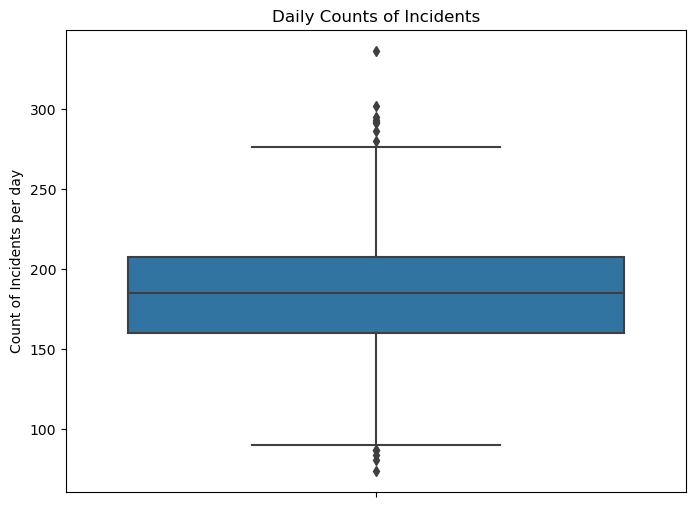

In [103]:
# Display the days with high incident numbers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df.groupby("date")['date'].value_counts())
plt.title('Daily Counts of Incidents')
plt.ylabel('Count of Incidents per day')
plt.show()

In [104]:
df.date.nunique()

2166

In [105]:
ramadan_10_days(df)

Total number of days: 2166
---------------------
Total number of cases: 398091
----------------------
Average Daily Case Count: 183.79
-------------------------
Yearly case counts according to the Gregorian calendar:
-------------------------------------------------------
2022    76854
2021    72561
2023    71028
2020    63754
2019    57625
2018    56269
Name: date, dtype: int64
--------------------------------------------
Case counts according to the Hijri calendar:
--------------------------------------------
1444    74148
1443    73197
1442    68855
1441    58223
1440    55247
1439    39212
1445    29209
Name: Hijri_Date, dtype: int64
----------------------------------------------------------
Average case count in the last ten days of Ramadan months: 177.6
----------------------------------------------------------
Average case count in other days: 183.9672
---------------------------------
Ratio of Ramadan cases to other cases: 0.9654
--------------------------------------


***We observe a -3.46% lower crime rate during the last 10 days of the Ramadan month compared to the annual average.***

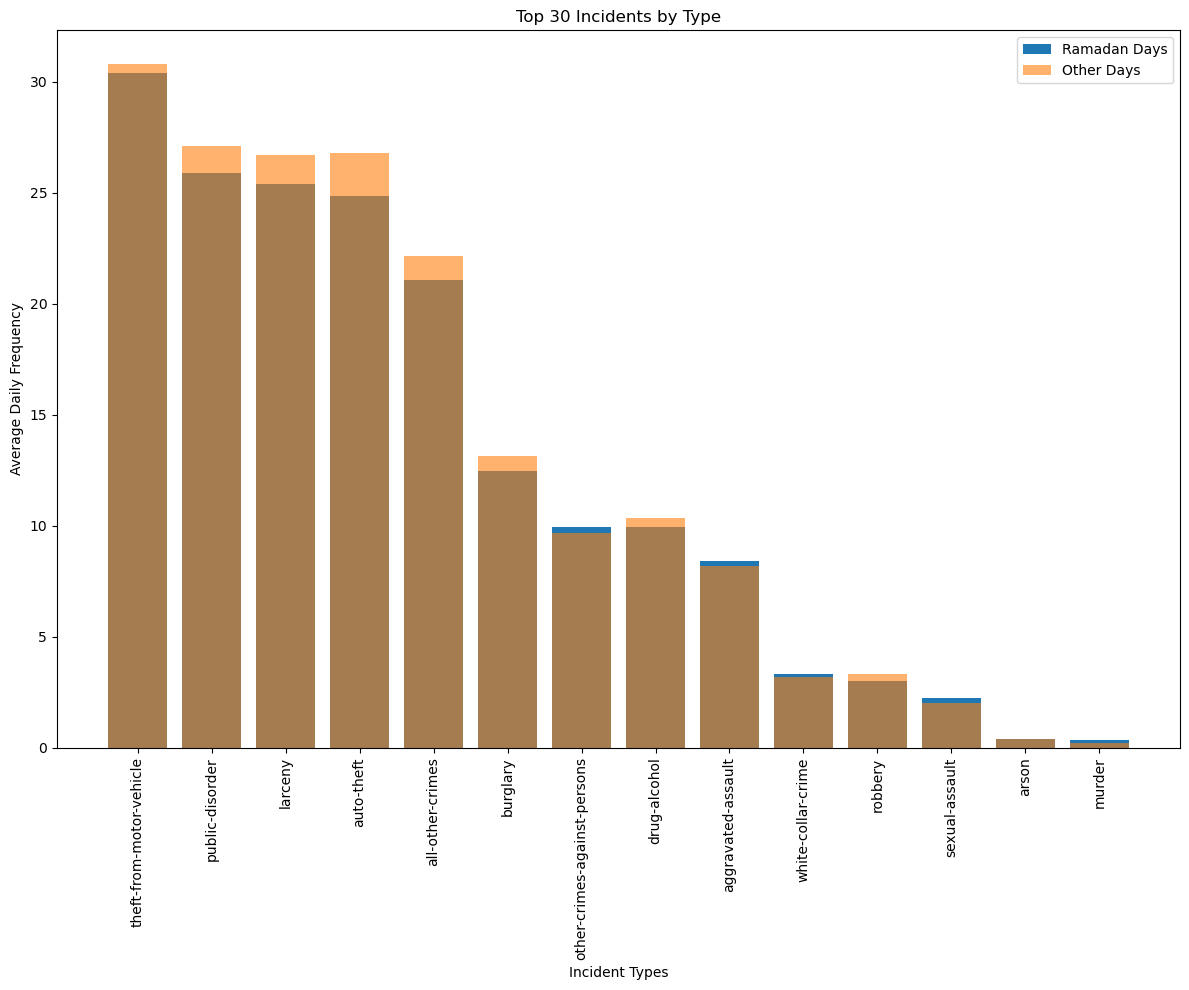

In [106]:
sorted_ratios, ramadan_dominant_incidents, ramadan_incidents_desc, other_days_incidents_desc  = incidents_by_types(df)
# display(sorted_ratios)
# display(ramadan_dominant_incidents)

In [107]:
# Top 30 incident types sorted by "ramadan incidents / total incidents" ratio
sorted_ratios

,ramadan incidents,all incidents,ramadan incidents/total incidents
murder,20,423,0.047300
sexual-assault,133,4411,0.030200
white-collar-crime,198,6898,0.028700
aggravated-assault,505,17703,0.028500
other-crimes-against-persons,597,21000,0.028400
arson,24,852,0.028200
theft-from-motor-vehicle,1823,66632,0.027400
drug-alcohol,596,22354,0.026700
public-disorder,1552,58617,0.026500
all-other-crimes,1265,47898,0.026400


In [108]:
# In which categories were more crimes committed during the last ten days of Ramadan?
ramadan_dominant_incidents

,ramadan incidents,all incidents,ramadan incidents/total incidents
other-crimes-against-persons,597,21000,0.0284
aggravated-assault,505,17703,0.0285
white-collar-crime,198,6898,0.0287
sexual-assault,133,4411,0.0302
arson,24,852,0.0282
murder,20,423,0.0473


In [109]:
df.incident.nunique(), ramadan_dominant_incidents.count()[0]

(14, 6)

In [110]:
ramadan_incidents_desc

count                        10656
unique                          14
top       theft-from-motor-vehicle
freq                          1823
Name: incident, dtype: object

In [111]:
other_days_incidents_desc

count                       387435
unique                          14
top       theft-from-motor-vehicle
freq                         64809
Name: incident, dtype: object

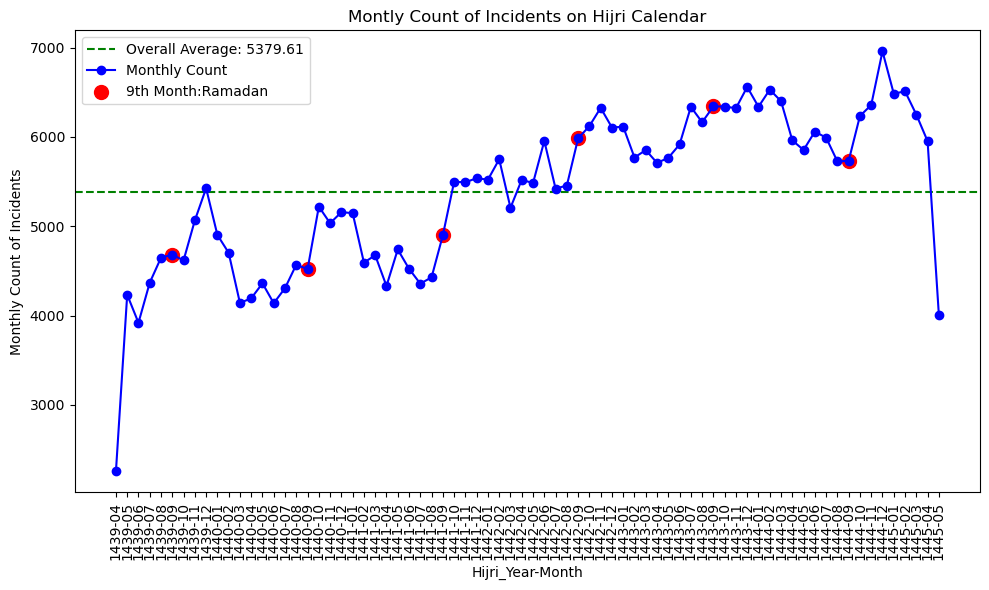

In [112]:
monthly_count_plot()

# SAMPLE DATA-6: VANCOUVER CRIME DATASET_2003-2017

https://www.kaggle.com/datasets/wosaku/crime-in-vancouver

In [113]:
df = pd.read_csv("crime_vancouver.csv", low_memory=False)
df

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
...,...,...,...,...,...,...,...,...,...,...,...,...
530647,Break and Enter Residential/Other,2017,3,3,9.0,16.0,31XX ADANAC ST,Hastings-Sunrise,497265.49,5458296.71,49.277420,-123.037595
530648,Mischief,2017,5,29,22.0,30.0,14XX E 7TH AVE,Grandview-Woodland,494533.97,5456824.97,49.264163,-123.075129
530649,Offence Against a Person,2017,4,13,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.00,0.00,0.000000,0.000000
530650,Theft from Vehicle,2017,6,5,17.0,0.0,8XX HAMILTON ST,Central Business District,491487.85,5458385.78,49.278168,-123.117031


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530652 entries, 0 to 530651
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TYPE           530652 non-null  object 
 1   YEAR           530652 non-null  int64  
 2   MONTH          530652 non-null  int64  
 3   DAY            530652 non-null  int64  
 4   HOUR           476290 non-null  float64
 5   MINUTE         476290 non-null  float64
 6   HUNDRED_BLOCK  530639 non-null  object 
 7   NEIGHBOURHOOD  474028 non-null  object 
 8   X              530652 non-null  float64
 9   Y              530652 non-null  float64
 10  Latitude       530652 non-null  float64
 11  Longitude      530652 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 48.6+ MB


In [115]:
df.duplicated().value_counts()

False    481814
True      48838
dtype: int64

In [116]:
df=df.drop_duplicates()

In [117]:
df["TYPE"].value_counts()

Theft from Vehicle                                        172699
Mischief                                                   70413
Break and Enter Residential/Other                          60862
Other Theft                                                52167
Theft of Vehicle                                           38418
Break and Enter Commercial                                 33845
Theft of Bicycle                                           25730
Vehicle Collision or Pedestrian Struck (with Injury)       21901
Offence Against a Person                                    5307
Vehicle Collision or Pedestrian Struck (with Fatality)       254
Homicide                                                     218
Name: TYPE, dtype: int64

In [ ]:
df['date'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])

In [ ]:
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

In [120]:
df = df.rename(columns={'TYPE':'incident'})

In [121]:
df.date.min(),df.date.max()

('2003-01-01', '2017-07-13')

In [122]:
df = df.iloc[:, [0,12]]
# df.to_csv("Vancouver.csv", index=False)

In [123]:
daily_incident_counts_stats = df.groupby("date")['date'].value_counts().describe([.25, .5, .75, .95, .98, .99]).astype(int)
daily_incident_counts_stats

count    5308
mean       90
std        25
min        25
25%        72
50%        87
75%       106
95%       137
98%       149
99%       157
max       615
Name: date, dtype: int32

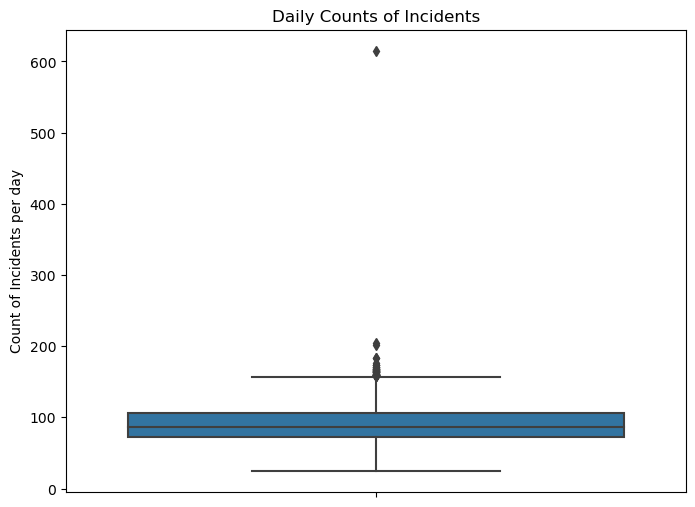

In [124]:
# Display the days with high incident numbers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df.groupby("date")['date'].value_counts())
plt.title('Daily Counts of Incidents')
plt.ylabel('Count of Incidents per day')
plt.show()

In [125]:
df.date.nunique()

5308

In [126]:
ramadan_10_days(df)

Total number of days: 5308
---------------------
Total number of cases: 481814
----------------------
Average Daily Case Count: 90.77
-------------------------
Yearly case counts according to the Gregorian calendar:
-------------------------------------------------------
2003    46785
2004    45841
2005    41257
2006    38336
2016    34991
2007    33645
2008    31554
2015    31491
2014    29866
2009    28652
2010    26322
2012    25802
2013    25758
2011    25068
2017    16446
Name: date, dtype: int64
--------------------------------------------
Case counts according to the Hijri calendar:
--------------------------------------------
1424    44964
1425    44520
1426    40126
1427    36870
1437    34998
1428    32436
1429    30522
1436    29213
1435    28641
1430    27944
1431    25668
1433    24866
1434    24799
1432    24377
1438    24138
1423     7732
Name: Hijri_Date, dtype: int64
----------------------------------------------------------
Average case count in the last ten days of R

***We observe a 1.70% higher crime rate during the last 10 days of the Ramadan month compared to the annual average.***

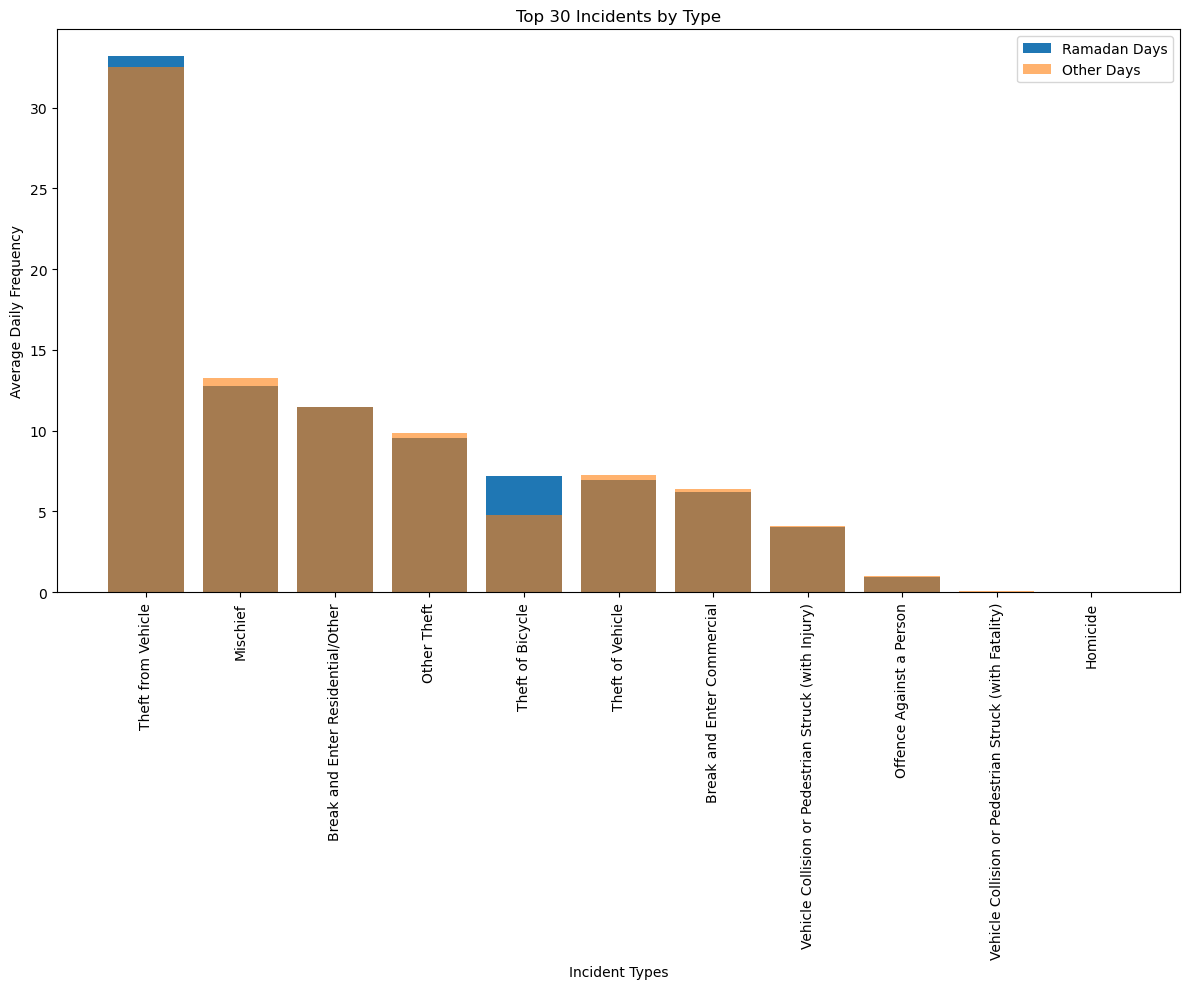

In [127]:
sorted_ratios, ramadan_dominant_incidents, ramadan_incidents_desc, other_days_incidents_desc  = incidents_by_types(df)
# display(sorted_ratios)
# display(ramadan_dominant_incidents)

In [128]:
# Top 30 incident types sorted by "ramadan incidents / total incidents" ratio
sorted_ratios

,ramadan incidents,all incidents,ramadan incidents/total incidents
Theft of Bicycle,1078,25730,0.041900
Theft from Vehicle,4977,172699,0.028800
Break and Enter Residential/Other,1716,60862,0.028200
Vehicle Collision or Pedestrian Struck (with Injury),606,21901,0.027700
Break and Enter Commercial,927,33845,0.027400
Other Theft,1431,52167,0.027400
Offence Against a Person,145,5307,0.027300
Mischief,1912,70413,0.027200
Theft of Vehicle,1041,38418,0.027100
Vehicle Collision or Pedestrian Struck (with Fatality),6,254,0.023600


In [129]:
# In which categories were more crimes committed during the last ten days of Ramadan?
ramadan_dominant_incidents

,ramadan incidents,all incidents,ramadan incidents/total incidents
Theft from Vehicle,4977,172699,0.0288
Theft of Bicycle,1078,25730,0.0419


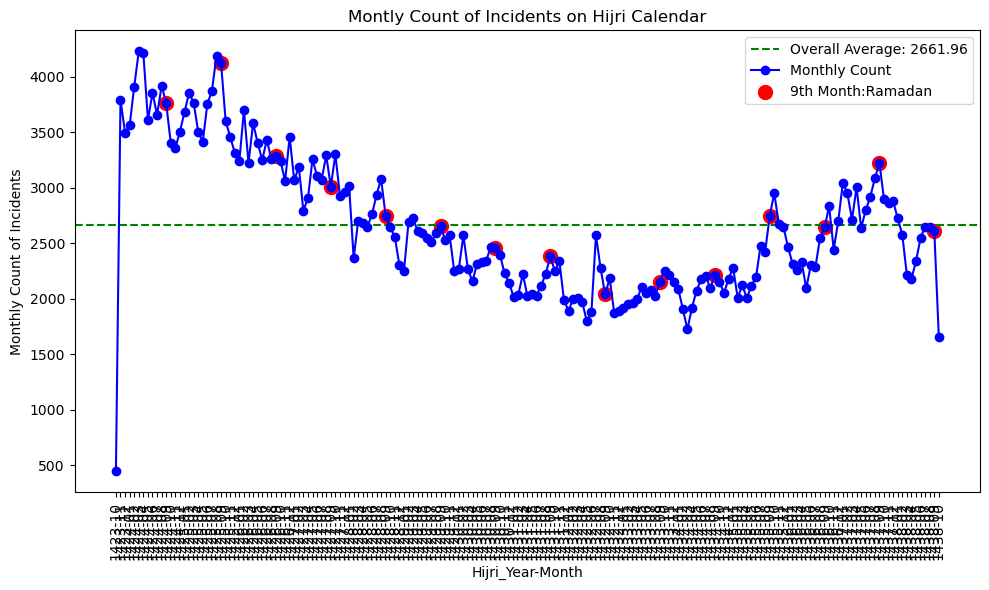

In [130]:
monthly_count_plot()

In [131]:
df.incident.nunique(), ramadan_dominant_incidents.count()[0]

(11, 2)

In [132]:
ramadan_incidents_desc

count                  13841
unique                    11
top       Theft from Vehicle
freq                    4977
Name: incident, dtype: object

In [133]:
other_days_incidents_desc

count                 467973
unique                    11
top       Theft from Vehicle
freq                  167722
Name: incident, dtype: object

Vancouver dataset encompasses 11 distinct incident types. During the last ten days of Ramadan, crimes were committed across 11 incident categories, with 2 of these categories experiencing incident counts exceeding the annual averages.

# SAMPLE DATA-7: CHICAGO CRIME DATASET_2001-2023

https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/data_preview

In [134]:
df = pd.read_csv("Chicago_Crimes_2001_to_Present.csv", index_col=0,)     
# to drop the duplicated rows with the same index numbers use index_col=0
df.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
ID,,,,,,,,,,,,,,,,,,,,,
11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7953830 entries, 11037294 to 12002171
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Case Number           object 
 1   Date                  object 
 2   Block                 object 
 3   IUCR                  object 
 4   Primary Type          object 
 5   Description           object 
 6   Location Description  object 
 7   Arrest                bool   
 8   Domestic              bool   
 9   Beat                  int64  
 10  District              float64
 11  Ward                  float64
 12  Community Area        float64
 13  FBI Code              object 
 14  X Coordinate          float64
 15  Y Coordinate          float64
 16  Year                  int64  
 17  Updated On            object 
 18  Latitude              float64
 19  Longitude             float64
 20  Location              object 
dtypes: bool(2), float64(7), int64(2), object(10)
memory usage: 1.2+ GB


In [136]:
# df = pd.read_csv("Chicago_Crimes_2001_to_Present.csv", usecols=[0, 2, 5, 6])

In [137]:
df.duplicated().value_counts()

False    7953669
True         161
dtype: int64

In [138]:
df = df.drop_duplicates()

In [139]:
df = df.iloc[:, [1, 4, 5]]

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7953669 entries, 11037294 to 12002171
Data columns (total 3 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Date          object
 1   Primary Type  object
 2   Description   object
dtypes: object(3)
memory usage: 242.7+ MB


In [141]:
df["Primary Type"].value_counts()

THEFT                                1679300
BATTERY                              1451708
CRIMINAL DAMAGE                       906654
NARCOTICS                             750859
ASSAULT                               521978
OTHER OFFENSE                         493465
BURGLARY                              429109
MOTOR VEHICLE THEFT                   393673
DECEPTIVE PRACTICE                    356129
ROBBERY                               299815
CRIMINAL TRESPASS                     217211
WEAPONS VIOLATION                     112009
PROSTITUTION                           69958
OFFENSE INVOLVING CHILDREN             56968
PUBLIC PEACE VIOLATION                 52892
SEX OFFENSE                            31684
CRIM SEXUAL ASSAULT                    27555
INTERFERENCE WITH PUBLIC OFFICER       18746
LIQUOR LAW VIOLATION                   15014
GAMBLING                               14630
ARSON                                  13586
HOMICIDE                               12820
CRIMINAL S

In [142]:
df = df.rename(columns = {'Date':'date'})
df = df.rename(columns = {'Primary Type':'incident'})

In [143]:
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

In [144]:
df.date.min(), df.date.max()

('2001-01-01', '2023-12-03')

In [145]:
# df.to_csv("Chicago.csv", index=False)

In [146]:
daily_incident_counts_stats = df.groupby("date")['date'].value_counts().describe([.25, .5, .75, .95, .98, .99]).astype(int)
daily_incident_counts_stats

count    8372
mean      950
std       283
min        11
25%       716
50%       894
75%      1199
95%      1406
98%      1470
99%      1523
max      2033
Name: date, dtype: int32

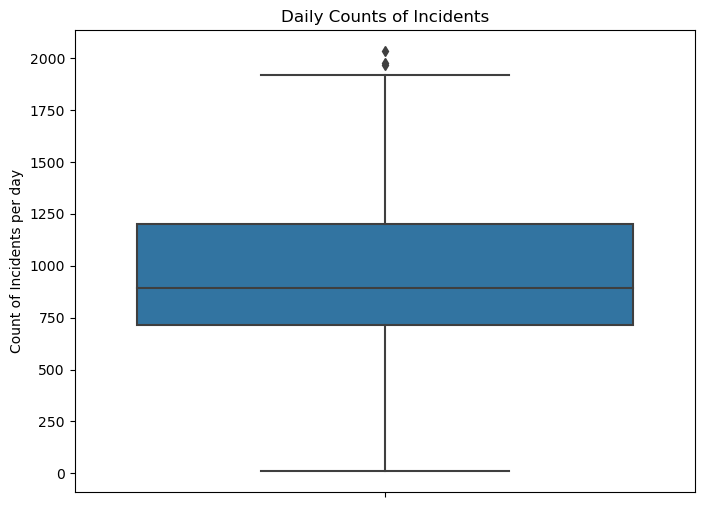

In [147]:
# Display the days with high incident numbers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df.groupby("date")['date'].value_counts())
plt.title('Daily Counts of Incidents')
plt.ylabel('Count of Incidents per day')
plt.show()

In [148]:
df.date.nunique()

8372

In [149]:
ramadan_10_days(df)

Total number of days: 8372
---------------------
Total number of cases: 7953669
----------------------
Average Daily Case Count: 950.03
-------------------------
Yearly case counts according to the Gregorian calendar:
-------------------------------------------------------
2002    486807
2001    485896
2003    475976
2004    469423
2005    453774
2006    448176
2007    437082
2008    427177
2009    392824
2010    370507
2011    351990
2012    336322
2013    307541
2014    275801
2016    269840
2017    269108
2018    268927
2015    264807
2019    261391
2023    240008
2022    239057
2020    212263
2021    208972
Name: date, dtype: int64
--------------------------------------------
Case counts according to the Hijri calendar:
--------------------------------------------
1422    470958
1423    470195
1424    461123
1425    455377
1426    445279
1427    434421
1428    425843
1429    413583
1430    383982
1431    362344
1432    340567
1433    328725
1434    303696
1435    271358
1439    261

***We observe a -1.42% lower crime rate during the last 10 days of the Ramadan month compared to the annual average.***

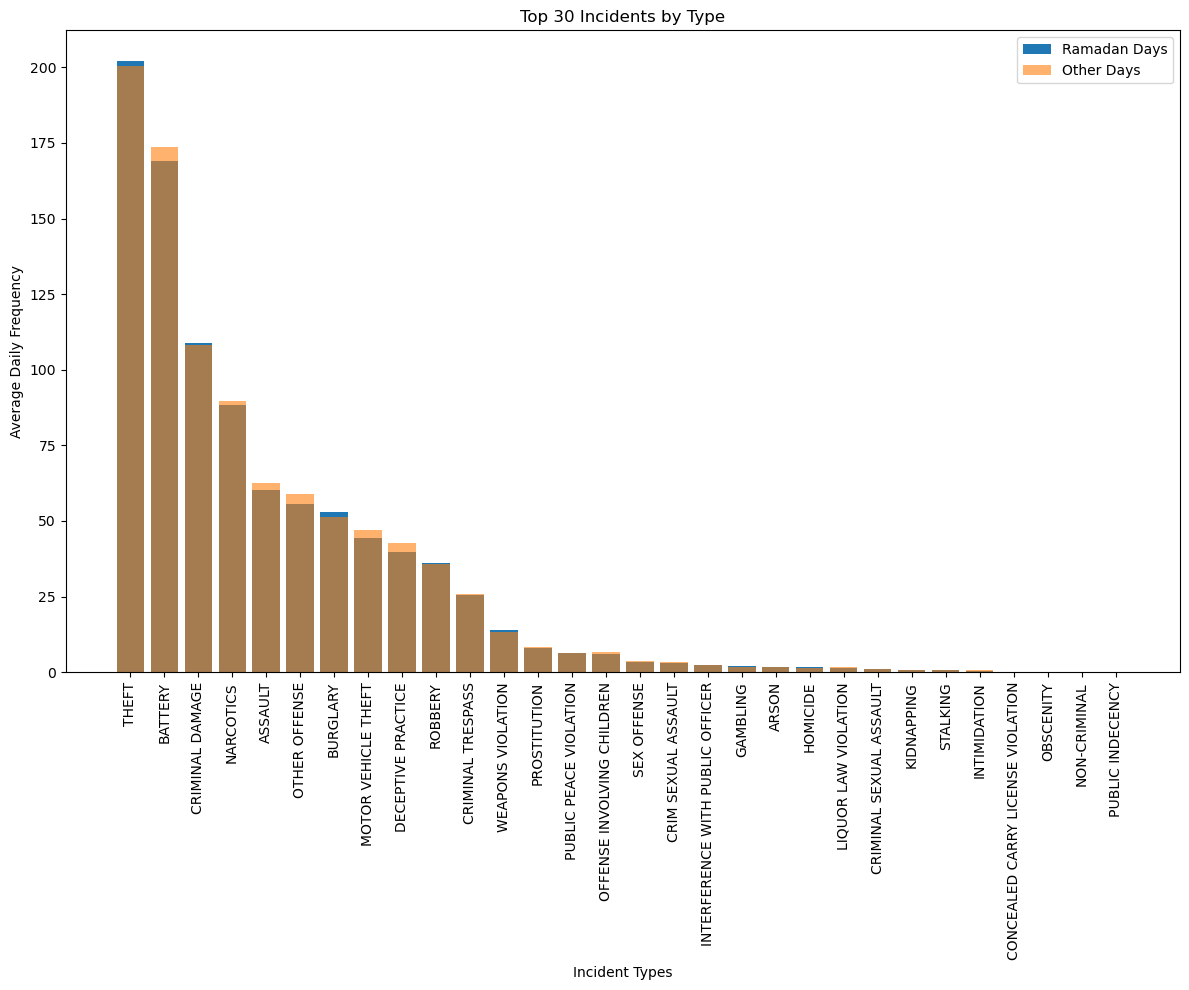

In [150]:
sorted_ratios, ramadan_dominant_incidents, ramadan_incidents_desc, other_days_incidents_desc  = incidents_by_types(df)
# display(sorted_ratios)
# display(ramadan_dominant_incidents)

In [151]:
# Top 30 incident types sorted by "ramadan incidents / total incidents" ratio
sorted_ratios

,ramadan incidents,all incidents,ramadan incidents/total incidents
RITUALISM,2,24,0.083300
NON-CRIMINAL,8,184,0.043500
HUMAN TRAFFICKING,4,105,0.038100
PUBLIC INDECENCY,7,197,0.035500
GAMBLING,501,14630,0.034200
INTERFERENCE WITH PUBLIC OFFICER,576,18746,0.030700
CONCEALED CARRY LICENSE VIOLATION,37,1205,0.030700
HOMICIDE,372,12820,0.029000
WEAPONS VIOLATION,3196,112009,0.028500
CRIMINAL SEXUAL ASSAULT,225,7881,0.028500


In [152]:
# In which categories were more crimes committed during the last ten days of Ramadan?
ramadan_dominant_incidents

,ramadan incidents,all incidents,ramadan incidents/total incidents
THEFT,46485,1679300,0.0277
CRIMINAL DAMAGE,25042,906654,0.0276
BURGLARY,12168,429109,0.0284
ROBBERY,8343,299815,0.0278
WEAPONS VIOLATION,3196,112009,0.0285
INTERFERENCE WITH PUBLIC OFFICER,576,18746,0.0307
GAMBLING,501,14630,0.0342
ARSON,376,13586,0.0277
HOMICIDE,372,12820,0.0290
CRIMINAL SEXUAL ASSAULT,225,7881,0.0285


In [153]:
df.incident.nunique(), ramadan_dominant_incidents.count()[0]

(36, 15)

In [154]:
ramadan_incidents_desc

count     215486
unique        34
top        THEFT
freq       46485
Name: incident, dtype: object

In [155]:
other_days_incidents_desc

count     7738183
unique         36
top         THEFT
freq      1632815
Name: incident, dtype: object

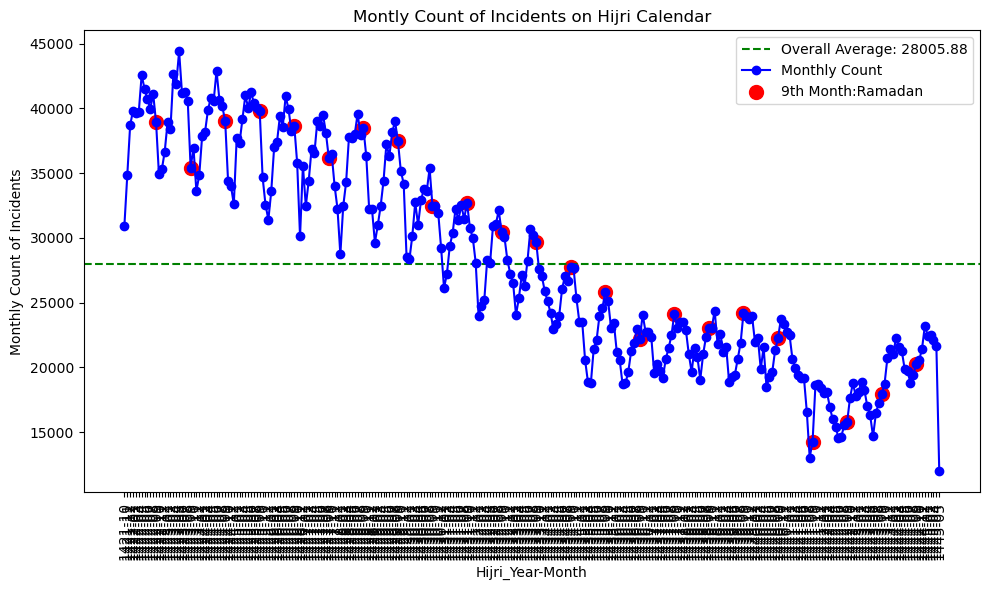

In [156]:
monthly_count_plot()

# SAMPLE DATA-8: BALTIMORE CRIME DATASET_2011-2015

https://data.world/baltimore/baltimore-crime-data/workspace/file?filename=BPD_Part_1_Victim_Based_Crime_Data.csv

In [157]:
df = pd.read_csv("BPD_Part_1_Victim_Based_Crime_Data.csv", low_memory=False)
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
0,06/18/2016,00:33:00,4E,2700 CHESLEY AVE,I,HANDS,424.0,NORTHEASTERN,North Harford Road,"(39.3679000000, -76.5555900000)",1
1,06/18/2016,00:39:00,4B,2700 FAIT AVE,O,KNIFE,232.0,SOUTHEASTERN,Canton,"(39.2831500000, -76.5783400000)",1
2,06/18/2016,0015,9S,2400 CYLBURN AV,Outside,FIREARM,532.0,NORTHERN,Levindale,"(39.3510400000, -76.6597600000)",1
3,06/18/2016,01:53:00,3AF,2300 ORLEANS ST,O,FIREARM,221.0,SOUTHEASTERN,McElderry Park,"(39.2955600000, -76.5844600000)",1
4,06/18/2016,02:05:00,6C,800 N WOLFE ST,I,NaN,321.0,EASTERN,Middle East,"(39.3002700000, -76.5909700000)",1


In [158]:
df.duplicated().value_counts()

False    253900
True      10596
dtype: int64

In [159]:
df = df.drop_duplicates()

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253900 entries, 0 to 264495
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        253900 non-null  object 
 1   CrimeTime        253900 non-null  object 
 2   CrimeCode        253900 non-null  object 
 3   Location         252173 non-null  object 
 4   Description      250114 non-null  object 
 5   Weapon           82019 non-null   object 
 6   Post             253701 non-null  float64
 7   District         253842 non-null  object 
 8   Neighborhood     252105 non-null  object 
 9   Location 1       252175 non-null  object 
 10  Total Incidents  253900 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 23.2+ MB


In [161]:
df["CrimeCode"].value_counts()

4E      41377
6D      35539
5A      25352
7A      22986
6G      15212
6J      11980
6C      11939
6E      11702
4C       9312
5D       7677
4B       6393
3AF      5660
3B       5296
4A       4019
4D       3482
5B       3367
6B       3345
5C       3187
4F       3167
6F       2436
9S       2118
3CF      1697
7C       1597
3K       1393
3AK      1381
2A       1354
1F       1047
3AO       949
5F        798
3AJF      742
5E        687
8H        652
3JF       645
3D        625
3P        544
6A        439
6L        373
3CK       259
8AO       243
2B        223
3GF       222
3BJ       221
3CO       194
3JK       185
3NF       179
3JO       151
1K        146
8J        145
6H        138
8FO        95
3H         92
1O         88
3NK        80
7B         80
8AV        68
8BO        67
3AJK       65
3EF        60
3M         58
3AJO       52
8EO        50
3NO        43
3F         40
3GK        35
3LF        21
3GO        20
3LO        17
8GO        15
3EK        13
8BV        12
8CO        10
8EV   

In [162]:
df = df.rename(columns = {'CrimeDate':'date'})
df = df.rename(columns= {'CrimeCode' : 'incident'})

In [163]:
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

In [164]:
df.date.min(), df.date.max()

('2011-01-01', '2016-06-18')

In [165]:
df = df.iloc[:, [0,2]]
# df.to_csv("Baltimore.csv", index=False)

In [166]:
daily_incident_counts_stats = df.groupby("date")['date'].value_counts().describe([.25, .5, .75, .95, .98, .99]).astype(int)
daily_incident_counts_stats

count    1996
mean      127
std        21
min        31
25%       114
50%       128
75%       142
95%       160
98%       167
99%       171
max       342
Name: date, dtype: int32

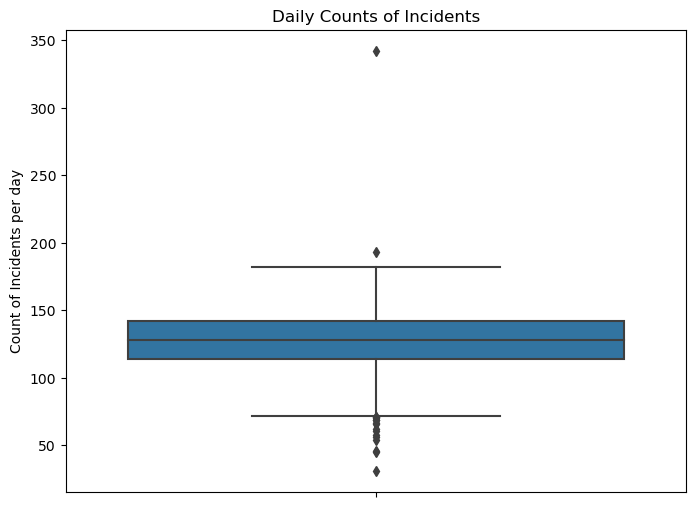

In [167]:
# Display the days with high incident numbers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df.groupby("date")['date'].value_counts())
plt.title('Daily Counts of Incidents')
plt.ylabel('Count of Incidents per day')
plt.show()

In [168]:
df.date.nunique()

1996

In [169]:
ramadan_10_days(df)

Total number of days: 1996
---------------------
Total number of cases: 253900
----------------------
Average Daily Case Count: 127.2
-------------------------
Yearly case counts according to the Gregorian calendar:
-------------------------------------------------------
2011    48555
2012    47643
2013    47569
2015    46643
2014    44343
2016    19147
Name: date, dtype: int64
--------------------------------------------
Case counts according to the Hijri calendar:
--------------------------------------------
1433    46536
1434    45861
1436    44720
1432    43976
1435    43592
1437    29215
Name: Hijri_Date, dtype: int64
----------------------------------------------------------
Average case count in the last ten days of Ramadan months: 114.75
----------------------------------------------------------
Average case count in other days: 127.5904
---------------------------------
Ratio of Ramadan cases to other cases: 0.8994
--------------------------------------


***We observe a -10.06% lower crime rate during the last 10 days of the Ramadan month compared to the annual average.***

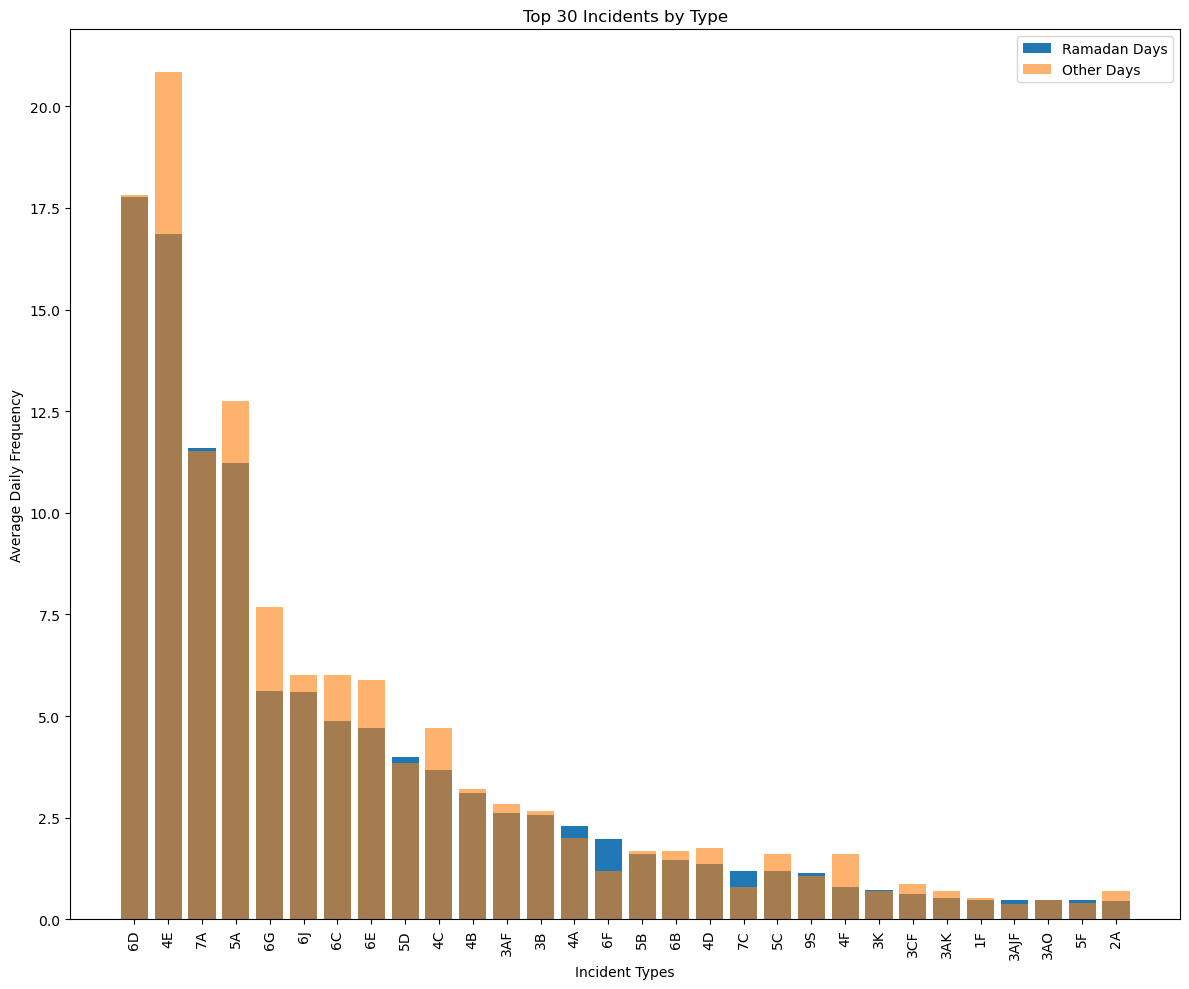

In [170]:
sorted_ratios, ramadan_dominant_incidents, ramadan_incidents_desc, other_days_incidents_desc  = incidents_by_types(df)
# display(sorted_ratios)
# display(ramadan_dominant_incidents)

In [171]:
# Top 30 incident types sorted by "ramadan incidents / total incidents" ratio
sorted_ratios

,ramadan incidents,all incidents,ramadan incidents/total incidents
3EO,1,7,0.142900
8I,1,7,0.142900
8CO,1,10,0.100000
3LF,2,21,0.095200
8BV,1,12,0.083300
8AV,5,68,0.073500
3M,4,58,0.069000
3EF,4,60,0.066700
3LO,1,17,0.058800
3GK,2,35,0.057100


In [172]:
# In which categories were more crimes committed during the last ten days of Ramadan?
ramadan_dominant_incidents

,ramadan incidents,all incidents,ramadan incidents/total incidents
7A,696,22986,0.0303
5D,239,7677,0.0311
4A,138,4019,0.0343
6F,118,2436,0.0484
7C,72,1597,0.0451
9S,68,2118,0.0321
3K,44,1393,0.0316
5F,29,798,0.0363
3AO,29,949,0.0306
3AJF,29,742,0.0391


In [173]:
df.incident.nunique(), ramadan_dominant_incidents.count()[0]

(81, 29)

In [174]:
ramadan_incidents_desc

count     6885
unique      68
top         6D
freq      1066
Name: incident, dtype: object

In [175]:
other_days_incidents_desc

count     247015
unique        81
top           4E
freq       40365
Name: incident, dtype: object

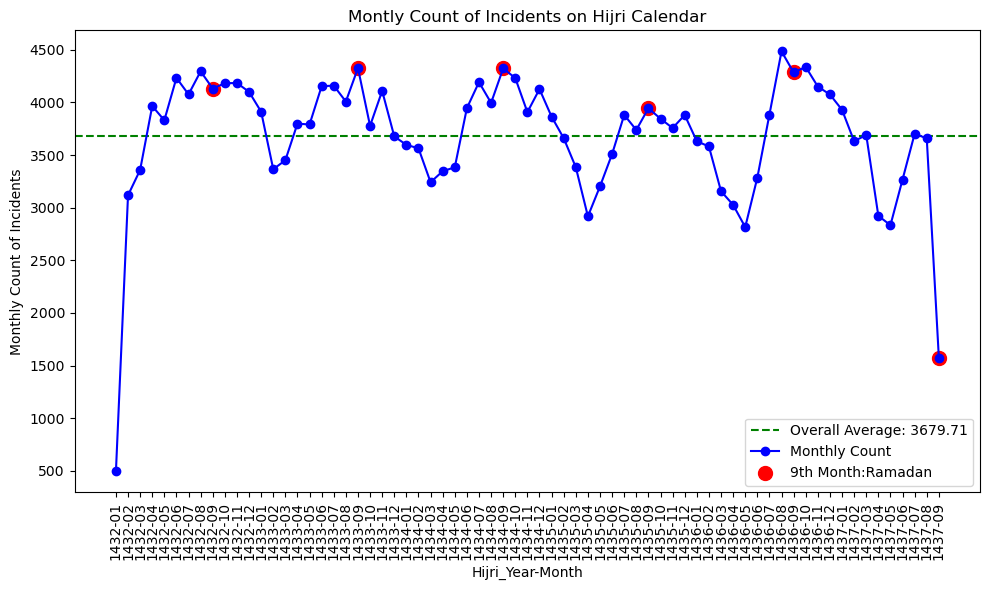

In [176]:
monthly_count_plot()

# SAMPLE DATA-9: ATLANTA CRIME DATASET_2009-2017

https://data.world/bryantahb/crime-in-atlanta-2009-2017

In [177]:
df = pd.read_csv("atlcrime.csv", low_memory=False)
df.drop(columns="Unnamed: 0", inplace=True)  
df

,crime,number,date,location,beat,neighborhood,npu,lat,long
0,LARCENY-NON VEHICLE,103040029,10/31/2010,610 SPRING ST NW,509,Downtown,M,33.77101,-84.38895
1,AUTO THEFT,103040061,10/31/2010,850 OAK ST SW,401,West End,T,33.74057,-84.41680
2,LARCENY-FROM VEHICLE,103040169,10/31/2010,1344 METROPOLITAN PKWY SW,301,Capitol View Manor,X,33.71803,-84.40774
3,AUTO THEFT,103040174,10/31/2010,1752 PRYOR RD SW,307,Betmar LaVilla,Y,33.70731,-84.39674
4,LARCENY-NON VEHICLE,103040301,10/31/2010,JOHN WESLEY DOBBS AVE NE / CORLEY ST NE,604,Old Fourth Ward,M,33.75947,-84.36626
...,...,...,...,...,...,...,...,...,...
270683,BURGLARY-RESIDENCE,92442142,09/01/2009,1226 PORTLAND AVE SE,612,East Atlanta,W,33.73927,-84.34741
270684,LARCENY-FROM VEHICLE,92442164,09/01/2009,317 PICKFAIR WAY SW,307,Lakewood Heights,Y,33.70436,-84.40013
270685,LARCENY-NON VEHICLE,92448045,09/01/2009,6234 SPINE RD @ATRIUM,50,NaN,NaN,33.64068,-84.44204
270686,LARCENY-NON VEHICLE,92440866,09/01/2009,30 WARREN ST,610,Kirkwood,O,33.75374,-84.32600


In [178]:
df.duplicated().value_counts()

False    270688
dtype: int64

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270688 entries, 0 to 270687
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   crime         270688 non-null  object 
 1   number        270688 non-null  int64  
 2   date          270688 non-null  object 
 3   location      270686 non-null  object 
 4   beat          270688 non-null  object 
 5   neighborhood  258928 non-null  object 
 6   npu           268592 non-null  object 
 7   lat           270688 non-null  float64
 8   long          270688 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 18.6+ MB


In [180]:
df["crime"].value_counts()

LARCENY-FROM VEHICLE    77345
LARCENY-NON VEHICLE     64697
BURGLARY-RESIDENCE      42941
AUTO THEFT              38168
AGG ASSAULT             19133
ROBBERY-PEDESTRIAN      14446
BURGLARY-NONRES          8505
ROBBERY-RESIDENCE        1880
ROBBERY-COMMERCIAL       1855
RAPE                      990
HOMICIDE                  728
Name: crime, dtype: int64

In [181]:
df = df.rename(columns= {'crime' : 'incident'})

In [182]:
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

In [183]:
df.date.min(), df.date.max()

('2009-01-01', '2017-02-28')

In [184]:
df = df.iloc[:, [0,2]]
# df.to_csv("Atlanta.csv", index=False)

In [185]:
daily_incident_counts_stats = df.groupby("date")['date'].value_counts().describe([.25, .5, .75, .95, .98, .99]).astype(int)
daily_incident_counts_stats

count    2981
mean       90
std        18
min        20
25%        78
50%        90
75%       103
95%       121
98%       130
99%       137
max       171
Name: date, dtype: int32

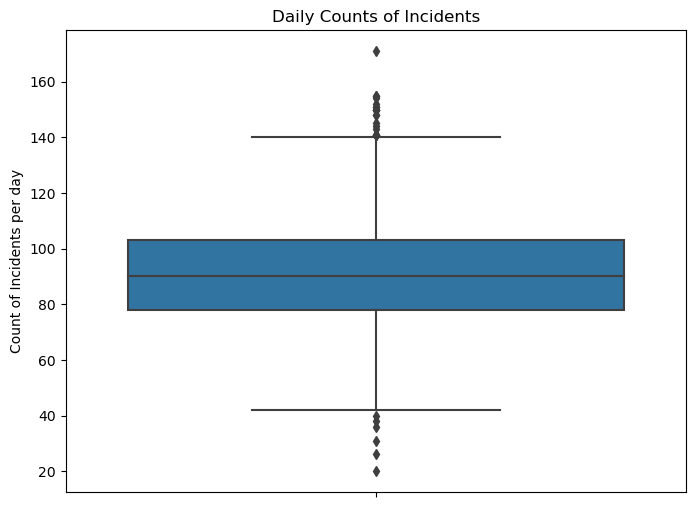

In [186]:
# Display the days with high incident numbers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df.groupby("date")['date'].value_counts())
plt.title('Daily Counts of Incidents')
plt.ylabel('Count of Incidents per day')
plt.show()

In [187]:
df.date.nunique()

2981

In [188]:
ramadan_10_days(df)

Total number of days: 2981
---------------------
Total number of cases: 270688
----------------------
Average Daily Case Count: 90.8
-------------------------
Yearly case counts according to the Gregorian calendar:
-------------------------------------------------------
2009    39626
2010    35770
2011    35174
2012    33394
2013    32303
2014    31166
2015    30117
2016    29131
2017     4007
Name: date, dtype: int64
--------------------------------------------
Case counts according to the Hijri calendar:
--------------------------------------------
1430    38259
1431    34884
1432    34032
1433    32539
1434    31776
1436    30133
1435    29559
1437    28162
1438    11344
Name: Hijri_Date, dtype: int64
----------------------------------------------------------
Average case count in the last ten days of Ramadan months: 93.5625
----------------------------------------------------------
Average case count in other days: 90.7284
---------------------------------
Ratio of Ramadan cases to

***We observe a 3.12% higher crime rate during the last 10 days of the Ramadan month compared to the annual average.***

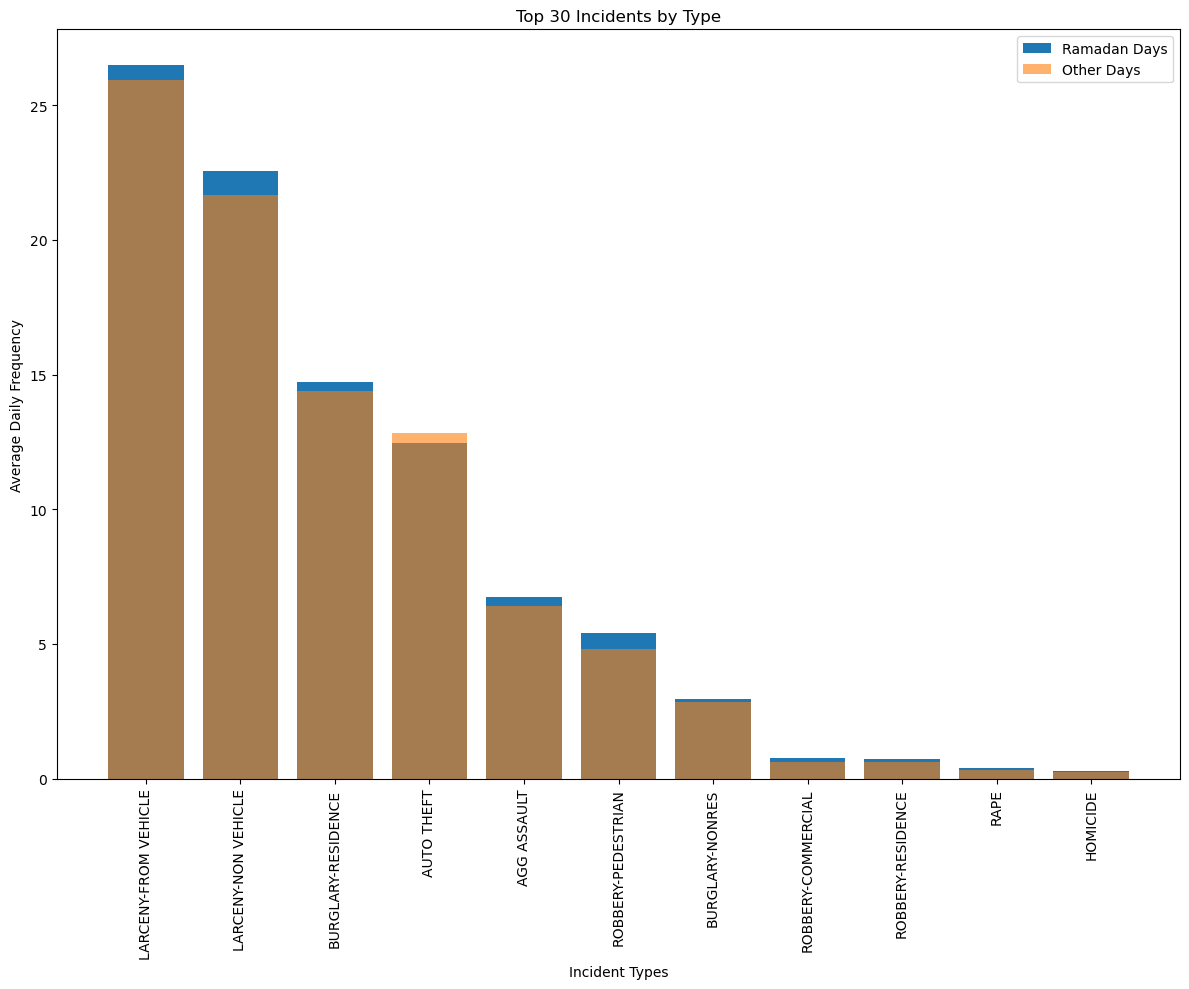

In [189]:
sorted_ratios, ramadan_dominant_incidents, ramadan_incidents_desc, other_days_incidents_desc  = incidents_by_types(df)
# display(sorted_ratios)
# display(ramadan_dominant_incidents)

In [190]:
# Top 30 incident types sorted by "ramadan incidents / total incidents" ratio
sorted_ratios

,ramadan incidents,all incidents,ramadan incidents/total incidents
ROBBERY-COMMERCIAL,62,1855,0.033400
HOMICIDE,24,728,0.033000
RAPE,31,990,0.031300
ROBBERY-RESIDENCE,58,1880,0.030900
ROBBERY-PEDESTRIAN,433,14446,0.030000
AGG ASSAULT,541,19133,0.028300
BURGLARY-NONRES,237,8505,0.027900
LARCENY-NON VEHICLE,1805,64697,0.027900
BURGLARY-RESIDENCE,1179,42941,0.027500
LARCENY-FROM VEHICLE,2119,77345,0.027400


In [191]:
# In which categories were more crimes committed during the last ten days of Ramadan?
ramadan_dominant_incidents

,ramadan incidents,all incidents,ramadan incidents/total incidents
LARCENY-FROM VEHICLE,2119,77345,0.0274
LARCENY-NON VEHICLE,1805,64697,0.0279
BURGLARY-RESIDENCE,1179,42941,0.0275
AGG ASSAULT,541,19133,0.0283
ROBBERY-PEDESTRIAN,433,14446,0.0300
BURGLARY-NONRES,237,8505,0.0279
ROBBERY-COMMERCIAL,62,1855,0.0334
ROBBERY-RESIDENCE,58,1880,0.0309
RAPE,31,990,0.0313
HOMICIDE,24,728,0.0330


In [192]:
df.incident.nunique(), ramadan_dominant_incidents.count()[0]

(11, 10)

In [193]:
ramadan_incidents_desc

count                     7485
unique                      11
top       LARCENY-FROM VEHICLE
freq                      2119
Name: incident, dtype: object

In [194]:
other_days_incidents_desc

count                   263203
unique                      11
top       LARCENY-FROM VEHICLE
freq                     75226
Name: incident, dtype: object

Atlanta dataset encompasses 11 distinct incident types. During the last ten days of Ramadan, crimes were committed across 11 incident categories, with 10 of these categories experiencing incident counts exceeding the annual averages.

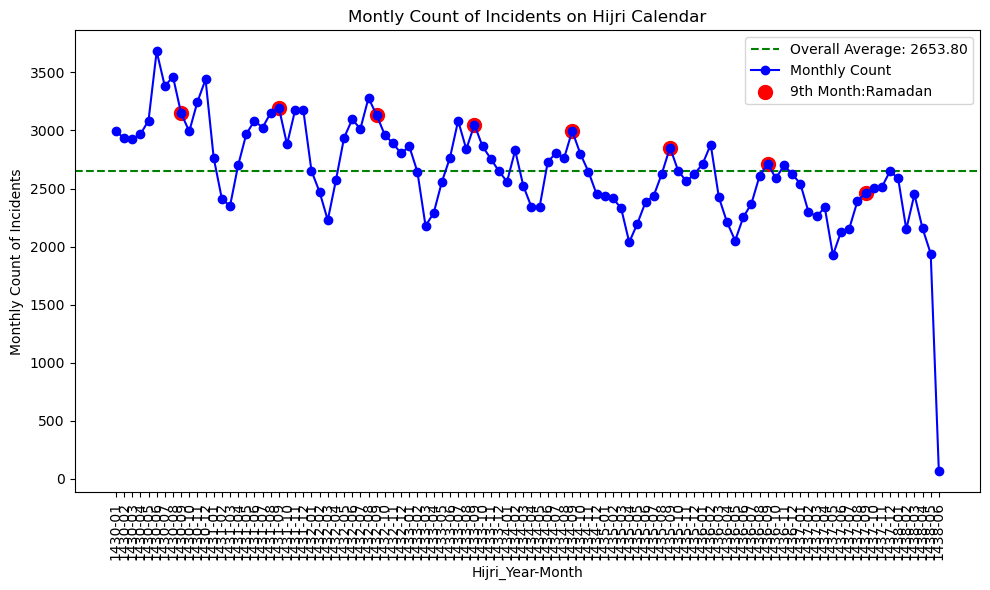

In [195]:
monthly_count_plot()

# SAMPLE DATA-10: OAKLAND CRIME STATISTICS_2011-2016

https://www.kaggle.com/datasets/cityofoakland/oakland-crime-statistics-2011-to-2016/

In [196]:
df2 = pd.read_csv("records-for-2011.csv")
df3 = pd.read_csv("records-for-2012.csv")
df4 = pd.read_csv("records-for-2013.csv")
df5 = pd.read_csv("records-for-2014.csv")
df6 = pd.read_csv("records-for-2015.csv")
df7 = pd.read_csv("records-for-2016.csv")

In [197]:
frames = [df2, df3, df4, df5, df6, df7]
df = pd.concat(frames)
df.head()

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time,Location 1,Zip Codes,Location
0,OP,2011-01-01T00:00:00.000,ST&SAN PABLO AV,1.0,06X,1.0,PDOA,POSSIBLE DEAD PERSON,LOP110101000001,2011-01-01T00:28:17.000,NaN,NaN,NaN
1,OP,2011-01-01T00:01:11.000,ST&HANNAH ST,1.0,07X,1.0,415GS,415 GUNSHOTS,LOP110101000002,2011-01-01T01:12:56.000,NaN,NaN,NaN
2,OP,2011-01-01T00:01:25.000,ST&MARKET ST,1.0,10Y,2.0,415GS,415 GUNSHOTS,LOP110101000003,2011-01-01T00:07:20.000,NaN,NaN,NaN
3,OP,2011-01-01T00:01:35.000,PRENTISS ST,2.0,21Y,2.0,415GS,415 GUNSHOTS,LOP110101000005,2011-01-01T00:02:28.000,NaN,NaN,NaN
4,OP,2011-01-01T00:02:10.000,AV&FOOTHILL BLVD,2.0,20X,1.0,415GS,415 GUNSHOTS,LOP110101000004,2011-01-01T00:50:04.000,NaN,NaN,NaN


In [198]:
df.duplicated().value_counts()

False    1046388
dtype: int64

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046388 entries, 0 to 110827
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Agency                     1046384 non-null  object 
 1   Create Time                1046384 non-null  object 
 2   Location                   483425 non-null   object 
 3   Area Id                    864023 non-null   object 
 4   Beat                       1040583 non-null  object 
 5   Priority                   1046384 non-null  float64
 6   Incident Type Id           1046384 non-null  object 
 7   Incident Type Description  1045996 non-null  object 
 8   Event Number               1046384 non-null  object 
 9   Closed Time                1046359 non-null  object 
 10  Location 1                 374799 non-null   object 
 11  Zip Codes                  352 non-null      float64
 12  Location                   188052 non-null   object 
dtypes: float64(2)

In [200]:
df["Incident Type Description"].value_counts()[:30]

ALARM-RINGER            98497
SECURITY CHECK          70965
911 HANG-UP             54935
STOLEN VEHICLE          47958
DISTURBING THE PEACE    38257
MENTALLY ILL            37218
415 UNKNOWN             33470
BATTERY                 30636
SUSPICIOUS PERSON       26984
BATTERY ON CO-HABITA    23964
415 GUNSHOTS            21520
415 FAMILY              21372
SUSPICIOUS VEHICLE      20781
ROBBERY                 19452
HAZARDOUS SITUATION/    18948
WELFARE CHECK -- CHE    17450
TRESPASS:               14819
VEHICLE COLLISION-PE    13782
ASSAULT W/DEADLY WEA    12982
415 THREATS             12819
HIT & RUN (PROPERTY     12417
FIGHT                   12062
STAND BY AND PRESERV    10584
DISTURBANCE-NEIGHBOR    10553
SUBJECT ARMED WITH W    10376
BURGLARY                10001
OBSTRUCT PERSON'S MO     9782
RUNAWAY                  9557
ALARM-MANUALLY ACTIV     9356
DISTURBANCE-CUSTOMER     8543
Name: Incident Type Description, dtype: int64

In [201]:
df = df.rename(columns = {'Create Time':'date'})
df = df.rename(columns = {'Incident Type Description':'incident'})

In [202]:
# df[df['date'].isnull()]
df = df.dropna(subset=['date'])

In [203]:
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

In [204]:
df.date.min(), df.date.max()

('2011-01-01', '2016-07-31')

In [205]:
df = df.iloc[:, [1,7]]
# df.to_csv("Oakland.csv", index=False)

In [206]:
daily_incident_counts_stats = df.groupby("date")['date'].value_counts().describe([.25, .5, .75, .95, .98, .99]).astype(int)
daily_incident_counts_stats

count    2039
mean      513
std        44
min       352
25%       485
50%       512
75%       539
95%       584
98%       607
99%       623
max       831
Name: date, dtype: int32

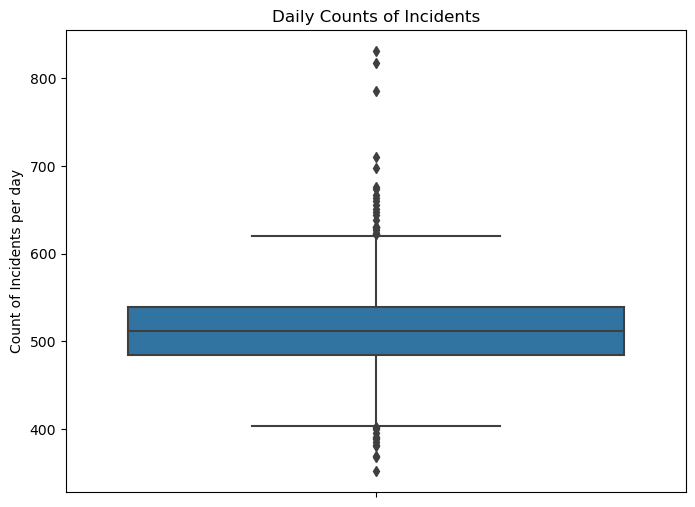

In [207]:
# Display the days with high incident numbers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df.groupby("date")['date'].value_counts())
plt.title('Daily Counts of Incidents')
plt.ylabel('Count of Incidents per day')
plt.show()

In [208]:
df.date.nunique()

2039

In [209]:
ramadan_10_days(df)

Total number of days: 2039
---------------------
Total number of cases: 1046384
----------------------
Average Daily Case Count: 513.18
-------------------------
Yearly case counts according to the Gregorian calendar:
-------------------------------------------------------
2015    192581
2013    188051
2014    187480
2012    187430
2011    180015
2016    110827
Name: date, dtype: int64
--------------------------------------------
Case counts according to the Hijri calendar:
--------------------------------------------
1436    188396
1434    184302
1435    180329
1433    180248
1432    163146
1437    149963
Name: Hijri_Date, dtype: int64
----------------------------------------------------------
Average case count in the last ten days of Ramadan months: 512.5333
----------------------------------------------------------
Average case count in other days: 513.2046
---------------------------------
Ratio of Ramadan cases to other cases: 0.9987
--------------------------------------


***We observe a -0.13% lower crime rate during the last 10 days of the Ramadan month compared to the annual average.***

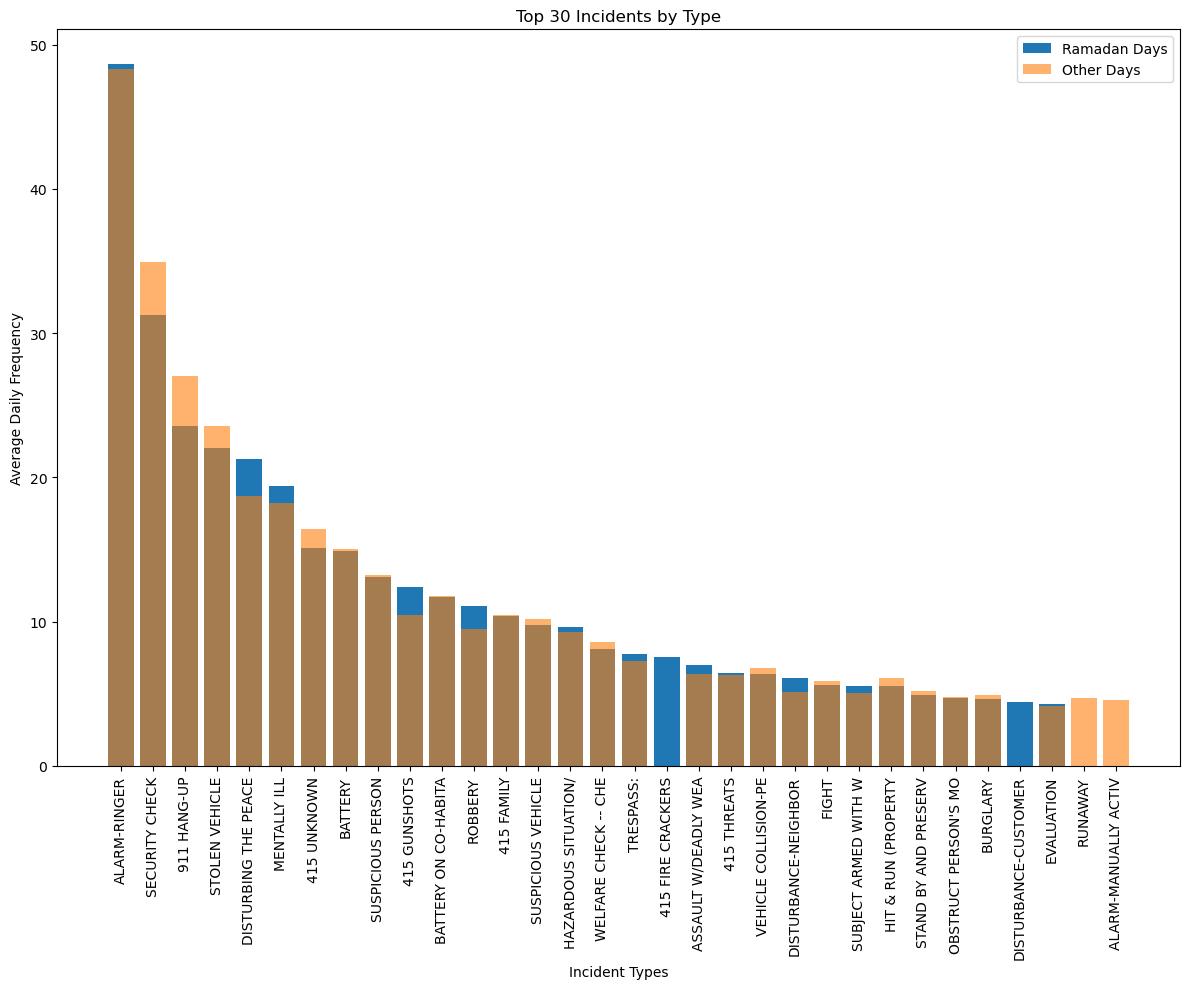

In [210]:
sorted_ratios, ramadan_dominant_incidents, ramadan_incidents_desc, other_days_incidents_desc  = incidents_by_types(df)
# display(sorted_ratios)
# display(ramadan_dominant_incidents)

In [211]:
# Top 30 incident types sorted by "ramadan incidents / total incidents" ratio
sorted_ratios

,ramadan incidents,all incidents,ramadan incidents/total incidents
INCEST,1,5,0.200000
IDENTITY THEFT,1,7,0.142900
ESCAPEE,1,8,0.125000
THREATEN WITNESS/VIC,2,16,0.125000
415 FIRE CRACKERS,452,3661,0.123500
"ALCOHOL,BEVERAGE AND",3,26,0.115400
SEWER PROBLEMS,3,27,0.111100
OFFICER NEEDS IMMEDI,2,21,0.095200
LOST VEHICLE,2,23,0.087000
SCOOTERS INVOLVED IN,4,62,0.064500


In [212]:
# In which categories were more crimes committed during the last ten days of Ramadan?
ramadan_dominant_incidents

,ramadan incidents,all incidents,ramadan incidents/total incidents
ALARM-RINGER,2918,98497,0.0296
DISTURBING THE PEACE,1275,38257,0.0333
MENTALLY ILL,1166,37218,0.0313
415 GUNSHOTS,743,21520,0.0345
ROBBERY,667,19452,0.0343
HAZARDOUS SITUATION/,579,18948,0.0306
TRESPASS:,467,14819,0.0315
415 FIRE CRACKERS,452,3661,0.1235
ASSAULT W/DEADLY WEA,418,12982,0.0322
415 THREATS,387,12819,0.0302


In [213]:
df.incident.nunique(), ramadan_dominant_incidents.count()[0]

(288, 108)

In [214]:
ramadan_incidents_desc

count            30744
unique             226
top       ALARM-RINGER
freq              2918
Name: incident, dtype: object

In [215]:
other_days_incidents_desc

count          1015252
unique             288
top       ALARM-RINGER
freq             95579
Name: incident, dtype: object

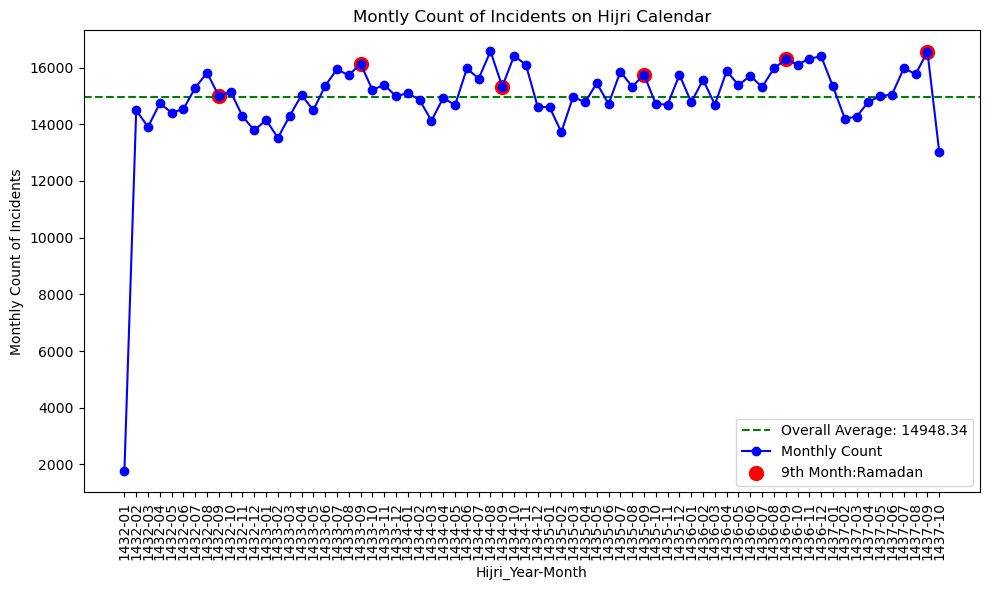

In [216]:
monthly_count_plot()

# CONCLUSION

In [217]:
results = pd.DataFrame({'UNC CHAPEL HILL': [-32.62, 25, 14.37],
                   'LOS ANGELES': [-3.33, -10.24, 0.79],
                   'KANSAS': [4.62, -8.06, 6.10],
                   'DETROIT': [-8.65, -8.85, 3.61],
                   'DENVER': [-3.46, 7.90, 9.17],
                   'VANCOUVER': [1.70, -0.28, 0.64],
                   'CHICAGO': [-1.42, -2.93, -1.96],
                   'BALTIMORE': [-10.06, -15, 9.45],
                   'ATLANTA': [3.12, 1.67, 2.06],                  
                   'OAKLAND': [-0.13,-19.60, 1.57]                     
                   })

In [218]:
results.index = ['Ramadan Last 10 Days/Other Days Ratio(%)','Muharram First 10 Days/Other Days Ratio(%)', \
                 'Zilhijjah First 10 Days/Other Days Ratio(%)']
daily_crime_ratios = results.T

In [219]:
daily_crime_ratios.iloc[:, :1]                          # .iloc[:, 0] return series

,Ramadan Last 10 Days/Other Days Ratio(%)
UNC CHAPEL HILL,-32.62
LOS ANGELES,-3.33
KANSAS,4.62
DETROIT,-8.65
DENVER,-3.46
VANCOUVER,1.70
CHICAGO,-1.42
BALTIMORE,-10.06
ATLANTA,3.12
OAKLAND,-0.13


In [220]:
daily_crime_ratios.iloc[:, :2]  

,Ramadan Last 10 Days/Other Days Ratio(%),Muharram First 10 Days/Other Days Ratio(%)
UNC CHAPEL HILL,-32.62,25.00
LOS ANGELES,-3.33,-10.24
KANSAS,4.62,-8.06
DETROIT,-8.65,-8.85
DENVER,-3.46,7.90
VANCOUVER,1.70,-0.28
CHICAGO,-1.42,-2.93
BALTIMORE,-10.06,-15.00
ATLANTA,3.12,1.67
OAKLAND,-0.13,-19.60


In [221]:
daily_crime_ratios 

,Ramadan Last 10 Days/Other Days Ratio(%),Muharram First 10 Days/Other Days Ratio(%),Zilhijjah First 10 Days/Other Days Ratio(%)
UNC CHAPEL HILL,-32.62,25.00,14.37
LOS ANGELES,-3.33,-10.24,0.79
KANSAS,4.62,-8.06,6.10
DETROIT,-8.65,-8.85,3.61
DENVER,-3.46,7.90,9.17
VANCOUVER,1.70,-0.28,0.64
CHICAGO,-1.42,-2.93,-1.96
BALTIMORE,-10.06,-15.00,9.45
ATLANTA,3.12,1.67,2.06
OAKLAND,-0.13,-19.60,1.57
